In [1]:
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
import shap
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

In [29]:
nutrition_test = pd.read_csv("Test_20.csv")
nutrition_train = pd.read_csv("Train_80.csv")
nutrition_test = nutrition_test.dropna()
nutrition_train = nutrition_train.dropna()


In [35]:
#extracting the nutrition data, labelling X as this is the input to the SKlearn algorithm
X_train = nutrition_train.iloc[:,:40]
nutrition_titles = X_train.columns
X_test = nutrition_test.iloc[:,:40]
#extracting the greenhouse gas emissions 
y_test = nutrition_test.iloc[:,41:42]
y_train = nutrition_train.iloc[:,41:42]
y_test = np.ravel(y_test)
y_train = np.ravel(y_train)

In [40]:
np.std(y_train)

1.627810534013884

In [41]:
np.std(y_test)

1.5401334777806188

In [21]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [22]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [23]:
#using a grid search to find 
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

0:	learn: 1.8633532	test: 1.5733025	best: 1.5733025 (0)	total: 1.14ms	remaining: 113ms
1:	learn: 1.8259724	test: 1.5396013	best: 1.5396013 (1)	total: 2.09ms	remaining: 102ms
2:	learn: 1.7917808	test: 1.5031691	best: 1.5031691 (2)	total: 2.92ms	remaining: 94.6ms
3:	learn: 1.7588223	test: 1.4746258	best: 1.4746258 (3)	total: 3.8ms	remaining: 91.1ms
4:	learn: 1.7348713	test: 1.4515589	best: 1.4515589 (4)	total: 4.67ms	remaining: 88.7ms
5:	learn: 1.7065590	test: 1.4289433	best: 1.4289433 (5)	total: 5.54ms	remaining: 86.8ms
6:	learn: 1.6792711	test: 1.4048940	best: 1.4048940 (6)	total: 6.47ms	remaining: 86ms
7:	learn: 1.6582370	test: 1.3915327	best: 1.3915327 (7)	total: 7.45ms	remaining: 85.7ms
8:	learn: 1.6318458	test: 1.3634829	best: 1.3634829 (8)	total: 8.44ms	remaining: 85.3ms
9:	learn: 1.6010875	test: 1.3318541	best: 1.3318541 (9)	total: 9.35ms	remaining: 84.1ms
10:	learn: 1.5773166	test: 1.3101235	best: 1.3101235 (10)	total: 10.2ms	remaining: 82.5ms
11:	learn: 1.5509226	test: 1.285633

65:	learn: 0.6855360	test: 0.7148256	best: 0.7070728 (57)	total: 62.8ms	remaining: 32.4ms
66:	learn: 0.6805378	test: 0.7116493	best: 0.7070728 (57)	total: 63.9ms	remaining: 31.5ms
67:	learn: 0.6785398	test: 0.7113217	best: 0.7070728 (57)	total: 65.2ms	remaining: 30.7ms
68:	learn: 0.6771775	test: 0.7110047	best: 0.7070728 (57)	total: 66.2ms	remaining: 29.7ms
69:	learn: 0.6751944	test: 0.7128773	best: 0.7070728 (57)	total: 67.3ms	remaining: 28.8ms
70:	learn: 0.6731348	test: 0.7118161	best: 0.7070728 (57)	total: 68.3ms	remaining: 27.9ms
71:	learn: 0.6692027	test: 0.7094720	best: 0.7070728 (57)	total: 69.4ms	remaining: 27ms
72:	learn: 0.6660820	test: 0.7102864	best: 0.7070728 (57)	total: 70.4ms	remaining: 26ms
73:	learn: 0.6646986	test: 0.7139584	best: 0.7070728 (57)	total: 71.4ms	remaining: 25.1ms
74:	learn: 0.6617621	test: 0.7108380	best: 0.7070728 (57)	total: 72.4ms	remaining: 24.1ms
75:	learn: 0.6578219	test: 0.7063053	best: 0.7063053 (75)	total: 73.5ms	remaining: 23.2ms
76:	learn: 0.6

26:	learn: 0.8694310	test: 0.7837301	best: 0.7837301 (26)	total: 22.7ms	remaining: 61.3ms
27:	learn: 0.8626360	test: 0.7833148	best: 0.7833148 (27)	total: 23.7ms	remaining: 60.9ms
28:	learn: 0.8522504	test: 0.7737722	best: 0.7737722 (28)	total: 24.9ms	remaining: 61ms
29:	learn: 0.8466041	test: 0.7688356	best: 0.7688356 (29)	total: 26ms	remaining: 60.6ms
30:	learn: 0.8409026	test: 0.7691622	best: 0.7688356 (29)	total: 26.9ms	remaining: 60ms
31:	learn: 0.8361971	test: 0.7716784	best: 0.7688356 (29)	total: 27.9ms	remaining: 59.3ms
32:	learn: 0.8251663	test: 0.7688098	best: 0.7688098 (32)	total: 28.9ms	remaining: 58.6ms
33:	learn: 0.8161494	test: 0.7653351	best: 0.7653351 (33)	total: 29.8ms	remaining: 57.9ms
34:	learn: 0.8120336	test: 0.7675594	best: 0.7653351 (33)	total: 30.8ms	remaining: 57.2ms
35:	learn: 0.8030658	test: 0.7628505	best: 0.7628505 (35)	total: 31.7ms	remaining: 56.4ms
36:	learn: 0.7998517	test: 0.7663435	best: 0.7628505 (35)	total: 32.7ms	remaining: 55.7ms
37:	learn: 0.793

18:	learn: 0.9575619	test: 0.8171120	best: 0.8171120 (18)	total: 16.3ms	remaining: 69.7ms
19:	learn: 0.9383807	test: 0.8064075	best: 0.8064075 (19)	total: 17.4ms	remaining: 69.5ms
20:	learn: 0.9308202	test: 0.8050046	best: 0.8050046 (20)	total: 18.6ms	remaining: 70.1ms
21:	learn: 0.9130151	test: 0.7921963	best: 0.7921963 (21)	total: 19.7ms	remaining: 70ms
22:	learn: 0.9031991	test: 0.7886532	best: 0.7886532 (22)	total: 20.9ms	remaining: 70ms
23:	learn: 0.8958066	test: 0.7886617	best: 0.7886532 (22)	total: 21.9ms	remaining: 69.5ms
24:	learn: 0.8880392	test: 0.7891920	best: 0.7886532 (22)	total: 22.9ms	remaining: 68.8ms
25:	learn: 0.8785549	test: 0.7867270	best: 0.7867270 (25)	total: 24ms	remaining: 68.3ms
26:	learn: 0.8729352	test: 0.7895112	best: 0.7867270 (25)	total: 25ms	remaining: 67.7ms
27:	learn: 0.8671105	test: 0.7890707	best: 0.7867270 (25)	total: 26ms	remaining: 66.9ms
28:	learn: 0.8564694	test: 0.7793915	best: 0.7793915 (28)	total: 27.1ms	remaining: 66.3ms
29:	learn: 0.8506271

84:	learn: 0.8813565	test: 0.7589190	best: 0.7589190 (84)	total: 81.1ms	remaining: 14.3ms
85:	learn: 0.8790797	test: 0.7583878	best: 0.7583878 (85)	total: 82.7ms	remaining: 13.5ms
86:	learn: 0.8774286	test: 0.7574203	best: 0.7574203 (86)	total: 84.7ms	remaining: 12.7ms
87:	learn: 0.8754513	test: 0.7576290	best: 0.7574203 (86)	total: 87ms	remaining: 11.9ms
88:	learn: 0.8713288	test: 0.7547863	best: 0.7547863 (88)	total: 89.7ms	remaining: 11.1ms
89:	learn: 0.8690874	test: 0.7544757	best: 0.7544757 (89)	total: 91.3ms	remaining: 10.1ms
90:	learn: 0.8654402	test: 0.7514280	best: 0.7514280 (90)	total: 92.9ms	remaining: 9.19ms
91:	learn: 0.8636752	test: 0.7509906	best: 0.7509906 (91)	total: 94.3ms	remaining: 8.2ms
92:	learn: 0.8600243	test: 0.7485910	best: 0.7485910 (92)	total: 95.4ms	remaining: 7.18ms
93:	learn: 0.8579711	test: 0.7489940	best: 0.7485910 (92)	total: 96.5ms	remaining: 6.16ms
94:	learn: 0.8559803	test: 0.7484556	best: 0.7484556 (94)	total: 97.7ms	remaining: 5.14ms
95:	learn: 0.

33:	learn: 1.1694503	test: 0.9451558	best: 0.9451558 (33)	total: 31.5ms	remaining: 107ms
34:	learn: 1.1598014	test: 0.9426067	best: 0.9426067 (34)	total: 32.6ms	remaining: 107ms
35:	learn: 1.1489916	test: 0.9338405	best: 0.9338405 (35)	total: 33.9ms	remaining: 107ms
36:	learn: 1.1371789	test: 0.9254323	best: 0.9254323 (36)	total: 35.2ms	remaining: 108ms
37:	learn: 1.1248776	test: 0.9137474	best: 0.9137474 (37)	total: 36.3ms	remaining: 107ms
38:	learn: 1.1137072	test: 0.9026106	best: 0.9026106 (38)	total: 37.3ms	remaining: 106ms
39:	learn: 1.1059928	test: 0.8975935	best: 0.8975935 (39)	total: 38.5ms	remaining: 106ms
40:	learn: 1.0959200	test: 0.8888089	best: 0.8888089 (40)	total: 39.5ms	remaining: 105ms
41:	learn: 1.0842533	test: 0.8811431	best: 0.8811431 (41)	total: 40.6ms	remaining: 104ms
42:	learn: 1.0754530	test: 0.8732762	best: 0.8732762 (42)	total: 41.6ms	remaining: 104ms
43:	learn: 1.0657276	test: 0.8657770	best: 0.8657770 (43)	total: 42.7ms	remaining: 103ms
44:	learn: 1.0580462	

56:	learn: 0.7072225	test: 0.7077165	best: 0.7077165 (56)	total: 48.6ms	remaining: 79.2ms
57:	learn: 0.7036745	test: 0.7070728	best: 0.7070728 (57)	total: 49.6ms	remaining: 78.7ms
58:	learn: 0.7019635	test: 0.7107624	best: 0.7070728 (57)	total: 50.8ms	remaining: 78.3ms
59:	learn: 0.6991329	test: 0.7118855	best: 0.7070728 (57)	total: 51.9ms	remaining: 77.9ms
60:	learn: 0.6965051	test: 0.7098651	best: 0.7070728 (57)	total: 53ms	remaining: 77.3ms
61:	learn: 0.6951453	test: 0.7097985	best: 0.7070728 (57)	total: 54.2ms	remaining: 76.9ms
62:	learn: 0.6923144	test: 0.7074974	best: 0.7070728 (57)	total: 55.2ms	remaining: 76.2ms
63:	learn: 0.6902247	test: 0.7116501	best: 0.7070728 (57)	total: 56.3ms	remaining: 75.6ms
64:	learn: 0.6876835	test: 0.7117277	best: 0.7070728 (57)	total: 57.4ms	remaining: 75ms
65:	learn: 0.6855360	test: 0.7148256	best: 0.7070728 (57)	total: 58.4ms	remaining: 74.4ms
66:	learn: 0.6805378	test: 0.7116493	best: 0.7070728 (57)	total: 59.5ms	remaining: 73.8ms
67:	learn: 0.6

81:	learn: 0.8740356	test: 0.7479853	best: 0.7479853 (81)	total: 75.3ms	remaining: 62.4ms
82:	learn: 0.8709020	test: 0.7470153	best: 0.7470153 (82)	total: 76.4ms	remaining: 61.7ms
83:	learn: 0.8684145	test: 0.7471309	best: 0.7470153 (82)	total: 77.6ms	remaining: 61ms
84:	learn: 0.8661134	test: 0.7478732	best: 0.7470153 (82)	total: 78.8ms	remaining: 60.3ms
85:	learn: 0.8639890	test: 0.7473954	best: 0.7470153 (82)	total: 79.9ms	remaining: 59.5ms
86:	learn: 0.8602709	test: 0.7434998	best: 0.7434998 (86)	total: 81ms	remaining: 58.7ms
87:	learn: 0.8578478	test: 0.7438808	best: 0.7434998 (86)	total: 82.2ms	remaining: 57.9ms
88:	learn: 0.8538582	test: 0.7412198	best: 0.7412198 (88)	total: 83.3ms	remaining: 57.1ms
89:	learn: 0.8517598	test: 0.7409557	best: 0.7409557 (89)	total: 84.4ms	remaining: 56.2ms
90:	learn: 0.8492389	test: 0.7423998	best: 0.7409557 (89)	total: 85.5ms	remaining: 55.4ms
91:	learn: 0.8471984	test: 0.7408047	best: 0.7408047 (91)	total: 86.6ms	remaining: 54.6ms
92:	learn: 0.8

108:	learn: 0.5858678	test: 0.6968747	best: 0.6923154 (95)	total: 89.4ms	remaining: 33.6ms
109:	learn: 0.5841723	test: 0.6936070	best: 0.6923154 (95)	total: 90.4ms	remaining: 32.9ms
110:	learn: 0.5835021	test: 0.6938001	best: 0.6923154 (95)	total: 91.6ms	remaining: 32.2ms
111:	learn: 0.5804761	test: 0.6963258	best: 0.6923154 (95)	total: 92.6ms	remaining: 31.4ms
112:	learn: 0.5778423	test: 0.6967032	best: 0.6923154 (95)	total: 93.7ms	remaining: 30.7ms
113:	learn: 0.5760310	test: 0.6956962	best: 0.6923154 (95)	total: 94.7ms	remaining: 29.9ms
114:	learn: 0.5746943	test: 0.6951245	best: 0.6923154 (95)	total: 95.7ms	remaining: 29.1ms
115:	learn: 0.5739020	test: 0.6970454	best: 0.6923154 (95)	total: 96.6ms	remaining: 28.3ms
116:	learn: 0.5708827	test: 0.6967668	best: 0.6923154 (95)	total: 97.6ms	remaining: 27.5ms
117:	learn: 0.5697606	test: 0.6967220	best: 0.6923154 (95)	total: 98.6ms	remaining: 26.7ms
118:	learn: 0.5692033	test: 0.6966735	best: 0.6923154 (95)	total: 99.6ms	remaining: 25.9ms

139:	learn: 0.7613982	test: 0.6969073	best: 0.6969073 (139)	total: 118ms	remaining: 8.46ms
140:	learn: 0.7602774	test: 0.6974022	best: 0.6969073 (139)	total: 119ms	remaining: 7.63ms
141:	learn: 0.7592916	test: 0.6974245	best: 0.6969073 (139)	total: 121ms	remaining: 6.8ms
142:	learn: 0.7583904	test: 0.6970934	best: 0.6969073 (139)	total: 122ms	remaining: 5.96ms
143:	learn: 0.7570783	test: 0.6973702	best: 0.6969073 (139)	total: 123ms	remaining: 5.11ms
144:	learn: 0.7557860	test: 0.6967493	best: 0.6967493 (144)	total: 124ms	remaining: 4.26ms
145:	learn: 0.7532240	test: 0.6956338	best: 0.6956338 (145)	total: 125ms	remaining: 3.42ms
146:	learn: 0.7524211	test: 0.6954941	best: 0.6954941 (146)	total: 126ms	remaining: 2.56ms
147:	learn: 0.7515704	test: 0.6962733	best: 0.6954941 (146)	total: 127ms	remaining: 1.71ms
148:	learn: 0.7497227	test: 0.6947635	best: 0.6947635 (148)	total: 128ms	remaining: 856us
149:	learn: 0.7486596	test: 0.6936838	best: 0.6936838 (149)	total: 129ms	remaining: 0us

bes

144:	learn: 0.5415986	test: 0.6975012	best: 0.6956800 (118)	total: 142ms	remaining: 4.88ms
145:	learn: 0.5410018	test: 0.6986507	best: 0.6956800 (118)	total: 143ms	remaining: 3.91ms
146:	learn: 0.5391065	test: 0.6970508	best: 0.6956800 (118)	total: 144ms	remaining: 2.94ms
147:	learn: 0.5382329	test: 0.6976405	best: 0.6956800 (118)	total: 145ms	remaining: 1.96ms
148:	learn: 0.5364562	test: 0.6975680	best: 0.6956800 (118)	total: 146ms	remaining: 979us
149:	learn: 0.5358366	test: 0.6977557	best: 0.6956800 (118)	total: 147ms	remaining: 0us

bestTest = 0.6956800065
bestIteration = 118

13:	loss: 0.6956800	best: 0.6805987 (1)	total: 1.9s	remaining: 11.1s
0:	learn: 1.8648928	test: 1.5746642	best: 1.5746642 (0)	total: 1.28ms	remaining: 190ms
1:	learn: 1.8287878	test: 1.5420689	best: 1.5420689 (1)	total: 2.28ms	remaining: 168ms
2:	learn: 1.7962710	test: 1.5074517	best: 1.5074517 (2)	total: 3.31ms	remaining: 162ms
3:	learn: 1.7646659	test: 1.4800375	best: 1.4800375 (3)	total: 4.35ms	remaining: 1

33:	learn: 0.8252928	test: 0.7595373	best: 0.7595373 (33)	total: 28.8ms	remaining: 98.4ms
34:	learn: 0.8221516	test: 0.7613136	best: 0.7595373 (33)	total: 29.9ms	remaining: 98.2ms
35:	learn: 0.8133500	test: 0.7566825	best: 0.7566825 (35)	total: 31ms	remaining: 98.1ms
36:	learn: 0.8105779	test: 0.7587654	best: 0.7566825 (35)	total: 32.1ms	remaining: 98ms
37:	learn: 0.8039141	test: 0.7555762	best: 0.7555762 (37)	total: 33.1ms	remaining: 97.7ms
38:	learn: 0.7967940	test: 0.7485979	best: 0.7485979 (38)	total: 34.2ms	remaining: 97.3ms
39:	learn: 0.7931634	test: 0.7465755	best: 0.7465755 (39)	total: 35.2ms	remaining: 96.8ms
40:	learn: 0.7909743	test: 0.7488642	best: 0.7465755 (39)	total: 36.2ms	remaining: 96.3ms
41:	learn: 0.7838672	test: 0.7436063	best: 0.7436063 (41)	total: 37.3ms	remaining: 95.8ms
42:	learn: 0.7803050	test: 0.7430954	best: 0.7430954 (42)	total: 38.3ms	remaining: 95.3ms
43:	learn: 0.7786192	test: 0.7447294	best: 0.7430954 (42)	total: 39.3ms	remaining: 94.8ms
44:	learn: 0.7

37:	learn: 1.1248776	test: 0.9137474	best: 0.9137474 (37)	total: 34.5ms	remaining: 147ms
38:	learn: 1.1137072	test: 0.9026106	best: 0.9026106 (38)	total: 35.6ms	remaining: 147ms
39:	learn: 1.1059928	test: 0.8975935	best: 0.8975935 (39)	total: 36.7ms	remaining: 147ms
40:	learn: 1.0959200	test: 0.8888089	best: 0.8888089 (40)	total: 37.7ms	remaining: 146ms
41:	learn: 1.0842533	test: 0.8811431	best: 0.8811431 (41)	total: 38.6ms	remaining: 145ms
42:	learn: 1.0754530	test: 0.8732762	best: 0.8732762 (42)	total: 39.4ms	remaining: 144ms
43:	learn: 1.0657276	test: 0.8657770	best: 0.8657770 (43)	total: 40.2ms	remaining: 143ms
44:	learn: 1.0580462	test: 0.8621302	best: 0.8621302 (44)	total: 41ms	remaining: 141ms
45:	learn: 1.0500159	test: 0.8564083	best: 0.8564083 (45)	total: 41.8ms	remaining: 140ms
46:	learn: 1.0420924	test: 0.8497992	best: 0.8497992 (46)	total: 43ms	remaining: 140ms
47:	learn: 1.0341095	test: 0.8428371	best: 0.8428371 (47)	total: 44.4ms	remaining: 141ms
48:	learn: 1.0284208	test

7:	learn: 1.2678394	test: 1.0655650	best: 1.0655650 (7)	total: 7.33ms	remaining: 176ms
8:	learn: 1.2150638	test: 1.0153819	best: 1.0153819 (8)	total: 8.54ms	remaining: 181ms
9:	learn: 1.1740276	test: 0.9886732	best: 0.9886732 (9)	total: 9.64ms	remaining: 183ms
10:	learn: 1.1329160	test: 0.9483951	best: 0.9483951 (10)	total: 10.5ms	remaining: 181ms
11:	learn: 1.1002529	test: 0.9264011	best: 0.9264011 (11)	total: 11.4ms	remaining: 178ms
12:	learn: 1.0739767	test: 0.9050314	best: 0.9050314 (12)	total: 12.5ms	remaining: 180ms
13:	learn: 1.0476031	test: 0.8822513	best: 0.8822513 (13)	total: 13.6ms	remaining: 181ms
14:	learn: 1.0260338	test: 0.8700471	best: 0.8700471 (14)	total: 14.6ms	remaining: 180ms
15:	learn: 0.9991044	test: 0.8408796	best: 0.8408796 (15)	total: 15.6ms	remaining: 179ms
16:	learn: 0.9791332	test: 0.8273392	best: 0.8273392 (16)	total: 16.6ms	remaining: 178ms
17:	learn: 0.9643926	test: 0.8193946	best: 0.8193946 (17)	total: 17.5ms	remaining: 177ms
18:	learn: 0.9540971	test: 

174:	learn: 0.4921435	test: 0.6878593	best: 0.6805987 (99)	total: 164ms	remaining: 23.5ms
175:	learn: 0.4906796	test: 0.6878174	best: 0.6805987 (99)	total: 167ms	remaining: 22.7ms
176:	learn: 0.4885873	test: 0.6874284	best: 0.6805987 (99)	total: 169ms	remaining: 22ms
177:	learn: 0.4876416	test: 0.6874843	best: 0.6805987 (99)	total: 170ms	remaining: 21ms
178:	learn: 0.4861472	test: 0.6866250	best: 0.6805987 (99)	total: 171ms	remaining: 20.1ms
179:	learn: 0.4854350	test: 0.6866638	best: 0.6805987 (99)	total: 172ms	remaining: 19.1ms
180:	learn: 0.4846338	test: 0.6872550	best: 0.6805987 (99)	total: 173ms	remaining: 18.2ms
181:	learn: 0.4826135	test: 0.6874827	best: 0.6805987 (99)	total: 174ms	remaining: 17.3ms
182:	learn: 0.4819338	test: 0.6872981	best: 0.6805987 (99)	total: 175ms	remaining: 16.3ms
183:	learn: 0.4810128	test: 0.6881374	best: 0.6805987 (99)	total: 176ms	remaining: 15.3ms
184:	learn: 0.4802356	test: 0.6870428	best: 0.6805987 (99)	total: 177ms	remaining: 14.3ms
185:	learn: 0.

111:	learn: 0.8051007	test: 0.7298431	best: 0.7280418 (109)	total: 126ms	remaining: 98.9ms
112:	learn: 0.8024397	test: 0.7275518	best: 0.7275518 (112)	total: 127ms	remaining: 97.8ms
113:	learn: 0.8004781	test: 0.7269788	best: 0.7269788 (113)	total: 128ms	remaining: 96.6ms
114:	learn: 0.7988585	test: 0.7275350	best: 0.7269788 (113)	total: 130ms	remaining: 95.8ms
115:	learn: 0.7968668	test: 0.7270601	best: 0.7269788 (113)	total: 131ms	remaining: 94.6ms
116:	learn: 0.7955266	test: 0.7253609	best: 0.7253609 (116)	total: 132ms	remaining: 93.4ms
117:	learn: 0.7932295	test: 0.7240214	best: 0.7240214 (117)	total: 133ms	remaining: 92.2ms
118:	learn: 0.7911283	test: 0.7224141	best: 0.7224141 (118)	total: 134ms	remaining: 91ms
119:	learn: 0.7896119	test: 0.7230199	best: 0.7224141 (118)	total: 135ms	remaining: 89.7ms
120:	learn: 0.7885459	test: 0.7239720	best: 0.7224141 (118)	total: 135ms	remaining: 88.5ms
121:	learn: 0.7860547	test: 0.7218568	best: 0.7218568 (121)	total: 137ms	remaining: 87.3ms
1

96:	learn: 0.6051303	test: 0.6941461	best: 0.6923154 (95)	total: 81.5ms	remaining: 86.6ms
97:	learn: 0.6014245	test: 0.6966554	best: 0.6923154 (95)	total: 82.6ms	remaining: 86ms
98:	learn: 0.6001243	test: 0.6960736	best: 0.6923154 (95)	total: 83.8ms	remaining: 85.5ms
99:	learn: 0.5981806	test: 0.6959418	best: 0.6923154 (95)	total: 84.9ms	remaining: 84.9ms
100:	learn: 0.5960086	test: 0.6950526	best: 0.6923154 (95)	total: 86ms	remaining: 84.3ms
101:	learn: 0.5943952	test: 0.6950558	best: 0.6923154 (95)	total: 87ms	remaining: 83.6ms
102:	learn: 0.5927550	test: 0.6945552	best: 0.6923154 (95)	total: 88ms	remaining: 82.9ms
103:	learn: 0.5912176	test: 0.6935434	best: 0.6923154 (95)	total: 89ms	remaining: 82.1ms
104:	learn: 0.5898390	test: 0.6959334	best: 0.6923154 (95)	total: 89.9ms	remaining: 81.4ms
105:	learn: 0.5891644	test: 0.6960742	best: 0.6923154 (95)	total: 90.9ms	remaining: 80.6ms
106:	learn: 0.5884217	test: 0.6959945	best: 0.6923154 (95)	total: 91.9ms	remaining: 79.9ms
107:	learn: 0

72:	learn: 0.9163805	test: 0.7810174	best: 0.7810174 (72)	total: 61.8ms	remaining: 107ms
73:	learn: 0.9108824	test: 0.7755836	best: 0.7755836 (73)	total: 62.8ms	remaining: 107ms
74:	learn: 0.9066760	test: 0.7710470	best: 0.7710470 (74)	total: 64ms	remaining: 107ms
75:	learn: 0.9017975	test: 0.7672372	best: 0.7672372 (75)	total: 65.1ms	remaining: 106ms
76:	learn: 0.8964729	test: 0.7622724	best: 0.7622724 (76)	total: 66.1ms	remaining: 106ms
77:	learn: 0.8933799	test: 0.7612521	best: 0.7612521 (77)	total: 67.1ms	remaining: 105ms
78:	learn: 0.8898667	test: 0.7587102	best: 0.7587102 (78)	total: 68.1ms	remaining: 104ms
79:	learn: 0.8864786	test: 0.7571368	best: 0.7571368 (79)	total: 69.2ms	remaining: 104ms
80:	learn: 0.8846396	test: 0.7553689	best: 0.7553689 (80)	total: 70.2ms	remaining: 103ms
81:	learn: 0.8806830	test: 0.7526156	best: 0.7526156 (81)	total: 71.2ms	remaining: 103ms
82:	learn: 0.8785381	test: 0.7525085	best: 0.7525085 (82)	total: 72.2ms	remaining: 102ms
83:	learn: 0.8763046	te

52:	learn: 0.7384274	test: 0.7370282	best: 0.7349328 (48)	total: 43.9ms	remaining: 122ms
53:	learn: 0.7316508	test: 0.7289672	best: 0.7289672 (53)	total: 45ms	remaining: 122ms
54:	learn: 0.7272564	test: 0.7295118	best: 0.7289672 (53)	total: 46.3ms	remaining: 122ms
55:	learn: 0.7253834	test: 0.7299124	best: 0.7289672 (53)	total: 47.3ms	remaining: 122ms
56:	learn: 0.7206177	test: 0.7257365	best: 0.7257365 (56)	total: 48.3ms	remaining: 121ms
57:	learn: 0.7172350	test: 0.7252151	best: 0.7252151 (57)	total: 49.3ms	remaining: 121ms
58:	learn: 0.7158637	test: 0.7270155	best: 0.7252151 (57)	total: 50.2ms	remaining: 120ms
59:	learn: 0.7129501	test: 0.7281602	best: 0.7252151 (57)	total: 51.2ms	remaining: 119ms
60:	learn: 0.7108450	test: 0.7241659	best: 0.7241659 (60)	total: 52.2ms	remaining: 119ms
61:	learn: 0.7080656	test: 0.7233674	best: 0.7233674 (61)	total: 53.1ms	remaining: 118ms
62:	learn: 0.7056277	test: 0.7213168	best: 0.7213168 (62)	total: 54.1ms	remaining: 118ms
63:	learn: 0.7038898	te

29:	learn: 1.2395611	test: 1.0009478	best: 1.0009478 (29)	total: 25.6ms	remaining: 145ms
30:	learn: 1.2267173	test: 0.9947034	best: 0.9947034 (30)	total: 26.7ms	remaining: 146ms
31:	learn: 1.2142480	test: 0.9838421	best: 0.9838421 (31)	total: 27.8ms	remaining: 146ms
32:	learn: 1.2004455	test: 0.9703064	best: 0.9703064 (32)	total: 29ms	remaining: 147ms
33:	learn: 1.1883067	test: 0.9640515	best: 0.9640515 (33)	total: 30ms	remaining: 146ms
34:	learn: 1.1789780	test: 0.9614630	best: 0.9614630 (34)	total: 31ms	remaining: 146ms
35:	learn: 1.1678263	test: 0.9511627	best: 0.9511627 (35)	total: 32.1ms	remaining: 146ms
36:	learn: 1.1555474	test: 0.9421564	best: 0.9421564 (36)	total: 33.1ms	remaining: 146ms
37:	learn: 1.1450513	test: 0.9333430	best: 0.9333430 (37)	total: 34.1ms	remaining: 146ms
38:	learn: 1.1334180	test: 0.9227086	best: 0.9227086 (38)	total: 35.3ms	remaining: 146ms
39:	learn: 1.1237797	test: 0.9145789	best: 0.9145789 (39)	total: 36.3ms	remaining: 145ms
40:	learn: 1.1146949	test: 

8:	learn: 1.2325285	test: 1.0282072	best: 1.0282072 (8)	total: 8.42ms	remaining: 179ms
9:	learn: 1.1920867	test: 1.0017735	best: 1.0017735 (9)	total: 9.51ms	remaining: 181ms
10:	learn: 1.1502361	test: 0.9605429	best: 0.9605429 (10)	total: 10.6ms	remaining: 182ms
11:	learn: 1.1166036	test: 0.9372826	best: 0.9372826 (11)	total: 11.5ms	remaining: 180ms
12:	learn: 1.0861052	test: 0.9099561	best: 0.9099561 (12)	total: 12.6ms	remaining: 181ms
13:	learn: 1.0591044	test: 0.8864454	best: 0.8864454 (13)	total: 13.4ms	remaining: 179ms
14:	learn: 1.0365555	test: 0.8731231	best: 0.8731231 (14)	total: 14.3ms	remaining: 176ms
15:	learn: 1.0093718	test: 0.8436282	best: 0.8436282 (15)	total: 15.1ms	remaining: 174ms
16:	learn: 0.9878634	test: 0.8342897	best: 0.8342897 (16)	total: 16ms	remaining: 173ms
17:	learn: 0.9734035	test: 0.8264581	best: 0.8264581 (17)	total: 17ms	remaining: 172ms
18:	learn: 0.9624974	test: 0.8219068	best: 0.8219068 (18)	total: 18ms	remaining: 172ms
19:	learn: 0.9437691	test: 0.81

163:	learn: 0.5468264	test: 0.6815977	best: 0.6779758 (147)	total: 164ms	remaining: 36.1ms
164:	learn: 0.5463623	test: 0.6816461	best: 0.6779758 (147)	total: 166ms	remaining: 35.1ms
165:	learn: 0.5443709	test: 0.6827749	best: 0.6779758 (147)	total: 167ms	remaining: 34.1ms
166:	learn: 0.5434928	test: 0.6842219	best: 0.6779758 (147)	total: 168ms	remaining: 33.2ms
167:	learn: 0.5433037	test: 0.6850285	best: 0.6779758 (147)	total: 169ms	remaining: 32.2ms
168:	learn: 0.5428628	test: 0.6841004	best: 0.6779758 (147)	total: 170ms	remaining: 31.2ms
169:	learn: 0.5420246	test: 0.6840276	best: 0.6779758 (147)	total: 171ms	remaining: 30.2ms
170:	learn: 0.5406397	test: 0.6832588	best: 0.6779758 (147)	total: 172ms	remaining: 29.2ms
171:	learn: 0.5403936	test: 0.6841010	best: 0.6779758 (147)	total: 173ms	remaining: 28.2ms
172:	learn: 0.5402759	test: 0.6848184	best: 0.6779758 (147)	total: 174ms	remaining: 27.2ms
173:	learn: 0.5398936	test: 0.6858702	best: 0.6779758 (147)	total: 175ms	remaining: 26.2ms

57:	learn: 0.8071651	test: 0.6764210	best: 0.6764210 (57)	total: 128ms	remaining: 92.5ms
58:	learn: 0.8012349	test: 0.6723817	best: 0.6723817 (58)	total: 130ms	remaining: 90.2ms
59:	learn: 0.7957746	test: 0.6702022	best: 0.6702022 (59)	total: 132ms	remaining: 88.1ms
60:	learn: 0.7879868	test: 0.6630206	best: 0.6630206 (60)	total: 134ms	remaining: 85.8ms
61:	learn: 0.7815926	test: 0.6622214	best: 0.6622214 (61)	total: 137ms	remaining: 83.7ms
62:	learn: 0.7738189	test: 0.6554081	best: 0.6554081 (62)	total: 139ms	remaining: 81.6ms
63:	learn: 0.7692898	test: 0.6535424	best: 0.6535424 (63)	total: 142ms	remaining: 79.6ms
64:	learn: 0.7651175	test: 0.6506018	best: 0.6506018 (64)	total: 144ms	remaining: 77.6ms
65:	learn: 0.7593469	test: 0.6452020	best: 0.6452020 (65)	total: 147ms	remaining: 75.9ms
66:	learn: 0.7517081	test: 0.6409427	best: 0.6409427 (66)	total: 150ms	remaining: 73.8ms
67:	learn: 0.7472592	test: 0.6390315	best: 0.6390315 (67)	total: 153ms	remaining: 72ms
68:	learn: 0.7421047	te

6:	learn: 1.6525447	test: 1.3759974	best: 1.3759974 (6)	total: 15ms	remaining: 200ms
7:	learn: 1.6199350	test: 1.3419140	best: 1.3419140 (7)	total: 17.8ms	remaining: 205ms
8:	learn: 1.5887062	test: 1.3128513	best: 1.3128513 (8)	total: 20.2ms	remaining: 204ms
9:	learn: 1.5570995	test: 1.2799228	best: 1.2799228 (9)	total: 22.8ms	remaining: 205ms
10:	learn: 1.5248960	test: 1.2496706	best: 1.2496706 (10)	total: 25.3ms	remaining: 204ms
11:	learn: 1.4961137	test: 1.2255758	best: 1.2255758 (11)	total: 27.9ms	remaining: 204ms
12:	learn: 1.4668894	test: 1.2001488	best: 1.2001488 (12)	total: 30.7ms	remaining: 205ms
13:	learn: 1.4392846	test: 1.1739230	best: 1.1739230 (13)	total: 33.2ms	remaining: 204ms
14:	learn: 1.4175045	test: 1.1580503	best: 1.1580503 (14)	total: 35.9ms	remaining: 204ms
15:	learn: 1.3917066	test: 1.1402926	best: 1.1402926 (15)	total: 38.4ms	remaining: 201ms
16:	learn: 1.3681713	test: 1.1224349	best: 1.1224349 (16)	total: 40.4ms	remaining: 197ms
17:	learn: 1.3445701	test: 1.09

44:	learn: 0.5483181	test: 0.6087733	best: 0.6087733 (44)	total: 131ms	remaining: 160ms
45:	learn: 0.5427260	test: 0.6057515	best: 0.6057515 (45)	total: 134ms	remaining: 158ms
46:	learn: 0.5384545	test: 0.6079025	best: 0.6057515 (45)	total: 137ms	remaining: 155ms
47:	learn: 0.5332959	test: 0.6044456	best: 0.6044456 (47)	total: 139ms	remaining: 151ms
48:	learn: 0.5303948	test: 0.6080250	best: 0.6044456 (47)	total: 141ms	remaining: 147ms
49:	learn: 0.5236097	test: 0.6017558	best: 0.6017558 (49)	total: 143ms	remaining: 143ms
50:	learn: 0.5186572	test: 0.5988061	best: 0.5988061 (50)	total: 147ms	remaining: 141ms
51:	learn: 0.5144686	test: 0.5987824	best: 0.5987824 (51)	total: 149ms	remaining: 138ms
52:	learn: 0.5116197	test: 0.5978608	best: 0.5978608 (52)	total: 152ms	remaining: 135ms
53:	learn: 0.5065613	test: 0.5943702	best: 0.5943702 (53)	total: 155ms	remaining: 132ms
54:	learn: 0.5015316	test: 0.5943123	best: 0.5943123 (54)	total: 158ms	remaining: 129ms
55:	learn: 0.4997512	test: 0.597

75:	learn: 0.7270191	test: 0.6176443	best: 0.6176443 (75)	total: 189ms	remaining: 59.6ms
76:	learn: 0.7217062	test: 0.6155400	best: 0.6155400 (76)	total: 191ms	remaining: 57.1ms
77:	learn: 0.7176242	test: 0.6138166	best: 0.6138166 (77)	total: 193ms	remaining: 54.5ms
78:	learn: 0.7121796	test: 0.6105196	best: 0.6105196 (78)	total: 196ms	remaining: 52ms
79:	learn: 0.7083226	test: 0.6077232	best: 0.6077232 (79)	total: 198ms	remaining: 49.6ms
80:	learn: 0.7038135	test: 0.6045510	best: 0.6045510 (80)	total: 201ms	remaining: 47.1ms
81:	learn: 0.7006013	test: 0.6036296	best: 0.6036296 (81)	total: 204ms	remaining: 44.8ms
82:	learn: 0.6982469	test: 0.6039267	best: 0.6036296 (81)	total: 207ms	remaining: 42.4ms
83:	learn: 0.6946022	test: 0.6037353	best: 0.6036296 (81)	total: 209ms	remaining: 39.9ms
84:	learn: 0.6913777	test: 0.6038574	best: 0.6036296 (81)	total: 212ms	remaining: 37.4ms
85:	learn: 0.6886002	test: 0.6049517	best: 0.6036296 (81)	total: 214ms	remaining: 34.9ms
86:	learn: 0.6860377	te

33:	learn: 1.0932573	test: 0.8617302	best: 0.8617302 (33)	total: 67.2ms	remaining: 131ms
34:	learn: 1.0789219	test: 0.8492032	best: 0.8492032 (34)	total: 69.9ms	remaining: 130ms
35:	learn: 1.0671593	test: 0.8404001	best: 0.8404001 (35)	total: 73.6ms	remaining: 131ms
36:	learn: 1.0542885	test: 0.8289992	best: 0.8289992 (36)	total: 77.1ms	remaining: 131ms
37:	learn: 1.0415934	test: 0.8183278	best: 0.8183278 (37)	total: 80.8ms	remaining: 132ms
38:	learn: 1.0279684	test: 0.8100495	best: 0.8100495 (38)	total: 84.6ms	remaining: 132ms
39:	learn: 1.0167564	test: 0.7997426	best: 0.7997426 (39)	total: 88.3ms	remaining: 132ms
40:	learn: 1.0058581	test: 0.7901417	best: 0.7901417 (40)	total: 91.9ms	remaining: 132ms
41:	learn: 0.9939603	test: 0.7819122	best: 0.7819122 (41)	total: 96.8ms	remaining: 134ms
42:	learn: 0.9835400	test: 0.7777554	best: 0.7777554 (42)	total: 101ms	remaining: 134ms
43:	learn: 0.9758862	test: 0.7737136	best: 0.7737136 (43)	total: 103ms	remaining: 132ms
44:	learn: 0.9657490	te

52:	learn: 0.5534749	test: 0.5908766	best: 0.5876682 (51)	total: 133ms	remaining: 118ms
53:	learn: 0.5485141	test: 0.5871100	best: 0.5871100 (53)	total: 136ms	remaining: 116ms
54:	learn: 0.5468973	test: 0.5896891	best: 0.5871100 (53)	total: 138ms	remaining: 113ms
55:	learn: 0.5456775	test: 0.5912945	best: 0.5871100 (53)	total: 141ms	remaining: 111ms
56:	learn: 0.5429644	test: 0.5914693	best: 0.5871100 (53)	total: 144ms	remaining: 108ms
57:	learn: 0.5397762	test: 0.5892955	best: 0.5871100 (53)	total: 147ms	remaining: 106ms
58:	learn: 0.5357709	test: 0.5855711	best: 0.5855711 (58)	total: 150ms	remaining: 104ms
59:	learn: 0.5333395	test: 0.5868624	best: 0.5855711 (58)	total: 152ms	remaining: 102ms
60:	learn: 0.5323552	test: 0.5854572	best: 0.5854572 (60)	total: 157ms	remaining: 100ms
61:	learn: 0.5289174	test: 0.5848751	best: 0.5848751 (61)	total: 160ms	remaining: 98ms
62:	learn: 0.5272226	test: 0.5865502	best: 0.5848751 (61)	total: 163ms	remaining: 95.5ms
63:	learn: 0.5246675	test: 0.585

102:	learn: 0.6181129	test: 0.6030928	best: 0.6022574 (96)	total: 218ms	remaining: 99.5ms
103:	learn: 0.6146066	test: 0.6039563	best: 0.6022574 (96)	total: 221ms	remaining: 97.7ms
104:	learn: 0.6113552	test: 0.6038967	best: 0.6022574 (96)	total: 223ms	remaining: 95.7ms
105:	learn: 0.6081579	test: 0.6023890	best: 0.6022574 (96)	total: 226ms	remaining: 93.7ms
106:	learn: 0.6049898	test: 0.5999397	best: 0.5999397 (106)	total: 228ms	remaining: 91.7ms
107:	learn: 0.6024080	test: 0.5999612	best: 0.5999397 (106)	total: 231ms	remaining: 89.7ms
108:	learn: 0.6009289	test: 0.5997658	best: 0.5997658 (108)	total: 233ms	remaining: 87.7ms
109:	learn: 0.5990335	test: 0.5987728	best: 0.5987728 (109)	total: 236ms	remaining: 85.7ms
110:	learn: 0.5972581	test: 0.5992798	best: 0.5987728 (109)	total: 239ms	remaining: 84.1ms
111:	learn: 0.5958781	test: 0.5998011	best: 0.5987728 (109)	total: 242ms	remaining: 82.2ms
112:	learn: 0.5934077	test: 0.5989622	best: 0.5987728 (109)	total: 244ms	remaining: 80ms
113:	

121:	learn: 0.2858597	test: 0.5357586	best: 0.5343375 (116)	total: 248ms	remaining: 57ms
122:	learn: 0.2849794	test: 0.5358188	best: 0.5343375 (116)	total: 251ms	remaining: 55.1ms
123:	learn: 0.2809351	test: 0.5368333	best: 0.5343375 (116)	total: 254ms	remaining: 53.2ms
124:	learn: 0.2794915	test: 0.5374542	best: 0.5343375 (116)	total: 256ms	remaining: 51.2ms
125:	learn: 0.2768794	test: 0.5352740	best: 0.5343375 (116)	total: 259ms	remaining: 49.2ms
126:	learn: 0.2740632	test: 0.5309304	best: 0.5309304 (126)	total: 261ms	remaining: 47.3ms
127:	learn: 0.2712778	test: 0.5291388	best: 0.5291388 (127)	total: 264ms	remaining: 45.3ms
128:	learn: 0.2699473	test: 0.5290043	best: 0.5290043 (128)	total: 266ms	remaining: 43.3ms
129:	learn: 0.2676068	test: 0.5295293	best: 0.5290043 (128)	total: 269ms	remaining: 41.3ms
130:	learn: 0.2666349	test: 0.5287424	best: 0.5287424 (130)	total: 285ms	remaining: 41.4ms
131:	learn: 0.2650156	test: 0.5279830	best: 0.5279830 (131)	total: 287ms	remaining: 39.2ms
1

102:	learn: 0.6298980	test: 0.5948872	best: 0.5948872 (102)	total: 231ms	remaining: 106ms
103:	learn: 0.6263495	test: 0.5954579	best: 0.5948872 (102)	total: 234ms	remaining: 104ms
104:	learn: 0.6232289	test: 0.5953016	best: 0.5948872 (102)	total: 237ms	remaining: 101ms
105:	learn: 0.6213370	test: 0.5950214	best: 0.5948872 (102)	total: 239ms	remaining: 99.3ms
106:	learn: 0.6180686	test: 0.5924672	best: 0.5924672 (106)	total: 242ms	remaining: 97.1ms
107:	learn: 0.6153840	test: 0.5925443	best: 0.5924672 (106)	total: 244ms	remaining: 95ms
108:	learn: 0.6137932	test: 0.5920785	best: 0.5920785 (108)	total: 247ms	remaining: 92.8ms
109:	learn: 0.6114577	test: 0.5920107	best: 0.5920107 (109)	total: 250ms	remaining: 90.8ms
110:	learn: 0.6097441	test: 0.5923309	best: 0.5920107 (109)	total: 252ms	remaining: 88.6ms
111:	learn: 0.6083031	test: 0.5931799	best: 0.5920107 (109)	total: 255ms	remaining: 86.5ms
112:	learn: 0.6059226	test: 0.5925025	best: 0.5920107 (109)	total: 259ms	remaining: 84.7ms
113:

111:	learn: 0.3128788	test: 0.5633429	best: 0.5632521 (109)	total: 230ms	remaining: 77.9ms
112:	learn: 0.3113246	test: 0.5625319	best: 0.5625319 (112)	total: 232ms	remaining: 76.1ms
113:	learn: 0.3088401	test: 0.5608243	best: 0.5608243 (113)	total: 235ms	remaining: 74.1ms
114:	learn: 0.3073560	test: 0.5593381	best: 0.5593381 (114)	total: 237ms	remaining: 72.2ms
115:	learn: 0.3048120	test: 0.5553194	best: 0.5553194 (115)	total: 240ms	remaining: 70.3ms
116:	learn: 0.3029242	test: 0.5551417	best: 0.5551417 (116)	total: 242ms	remaining: 68.4ms
117:	learn: 0.3019263	test: 0.5555716	best: 0.5551417 (116)	total: 245ms	remaining: 66.4ms
118:	learn: 0.3002205	test: 0.5535210	best: 0.5535210 (118)	total: 248ms	remaining: 64.5ms
119:	learn: 0.2985178	test: 0.5536995	best: 0.5535210 (118)	total: 250ms	remaining: 62.5ms
120:	learn: 0.2957660	test: 0.5555149	best: 0.5535210 (118)	total: 253ms	remaining: 60.6ms
121:	learn: 0.2925165	test: 0.5548490	best: 0.5535210 (118)	total: 255ms	remaining: 58.6ms

114:	learn: 0.6069537	test: 0.5816018	best: 0.5816018 (114)	total: 250ms	remaining: 76ms
115:	learn: 0.6044823	test: 0.5812416	best: 0.5812416 (115)	total: 252ms	remaining: 74ms
116:	learn: 0.6036239	test: 0.5821434	best: 0.5812416 (115)	total: 255ms	remaining: 72ms
117:	learn: 0.6009650	test: 0.5806007	best: 0.5806007 (117)	total: 258ms	remaining: 69.9ms
118:	learn: 0.5981434	test: 0.5796829	best: 0.5796829 (118)	total: 260ms	remaining: 67.8ms
119:	learn: 0.5956985	test: 0.5782029	best: 0.5782029 (119)	total: 263ms	remaining: 65.8ms
120:	learn: 0.5940816	test: 0.5777533	best: 0.5777533 (120)	total: 266ms	remaining: 63.7ms
121:	learn: 0.5918312	test: 0.5754595	best: 0.5754595 (121)	total: 269ms	remaining: 61.7ms
122:	learn: 0.5879360	test: 0.5753763	best: 0.5753763 (122)	total: 272ms	remaining: 59.7ms
123:	learn: 0.5865205	test: 0.5742254	best: 0.5742254 (123)	total: 275ms	remaining: 57.6ms
124:	learn: 0.5839963	test: 0.5730021	best: 0.5730021 (124)	total: 277ms	remaining: 55.3ms
125:	

109:	learn: 0.3390011	test: 0.5474592	best: 0.5474592 (109)	total: 248ms	remaining: 90ms
110:	learn: 0.3373183	test: 0.5472924	best: 0.5472924 (110)	total: 250ms	remaining: 88ms
111:	learn: 0.3356973	test: 0.5465635	best: 0.5465635 (111)	total: 254ms	remaining: 86.1ms
112:	learn: 0.3331897	test: 0.5450571	best: 0.5450571 (112)	total: 256ms	remaining: 83.9ms
113:	learn: 0.3325406	test: 0.5463259	best: 0.5450571 (112)	total: 259ms	remaining: 81.8ms
114:	learn: 0.3316572	test: 0.5462491	best: 0.5450571 (112)	total: 262ms	remaining: 79.7ms
115:	learn: 0.3292745	test: 0.5449700	best: 0.5449700 (115)	total: 264ms	remaining: 77.5ms
116:	learn: 0.3279128	test: 0.5430931	best: 0.5430931 (116)	total: 267ms	remaining: 75.4ms
117:	learn: 0.3264972	test: 0.5426191	best: 0.5426191 (117)	total: 271ms	remaining: 73.5ms
118:	learn: 0.3250439	test: 0.5425113	best: 0.5425113 (118)	total: 273ms	remaining: 71.1ms
119:	learn: 0.3205057	test: 0.5434885	best: 0.5425113 (118)	total: 275ms	remaining: 68.8ms
120

110:	learn: 0.6476285	test: 0.5876193	best: 0.5870854 (109)	total: 242ms	remaining: 84.9ms
111:	learn: 0.6461633	test: 0.5865681	best: 0.5865681 (111)	total: 244ms	remaining: 82.9ms
112:	learn: 0.6436217	test: 0.5849385	best: 0.5849385 (112)	total: 247ms	remaining: 80.9ms
113:	learn: 0.6418377	test: 0.5844872	best: 0.5844872 (113)	total: 250ms	remaining: 78.8ms
114:	learn: 0.6386906	test: 0.5823492	best: 0.5823492 (114)	total: 252ms	remaining: 76.7ms
115:	learn: 0.6369757	test: 0.5817217	best: 0.5817217 (115)	total: 255ms	remaining: 74.6ms
116:	learn: 0.6362432	test: 0.5822422	best: 0.5817217 (115)	total: 257ms	remaining: 72.5ms
117:	learn: 0.6346103	test: 0.5828723	best: 0.5817217 (115)	total: 260ms	remaining: 70.4ms
118:	learn: 0.6320858	test: 0.5822170	best: 0.5817217 (115)	total: 262ms	remaining: 68.3ms
119:	learn: 0.6301875	test: 0.5808902	best: 0.5808902 (119)	total: 265ms	remaining: 66.2ms
120:	learn: 0.6265771	test: 0.5798937	best: 0.5798937 (120)	total: 267ms	remaining: 64ms
1

105:	learn: 0.4241838	test: 0.5859591	best: 0.5819912 (93)	total: 253ms	remaining: 105ms
106:	learn: 0.4179886	test: 0.5840189	best: 0.5819912 (93)	total: 256ms	remaining: 103ms
107:	learn: 0.4171014	test: 0.5846561	best: 0.5819912 (93)	total: 258ms	remaining: 100ms
108:	learn: 0.4165966	test: 0.5853407	best: 0.5819912 (93)	total: 263ms	remaining: 98.8ms
109:	learn: 0.4159454	test: 0.5853189	best: 0.5819912 (93)	total: 266ms	remaining: 96.5ms
110:	learn: 0.4153267	test: 0.5852952	best: 0.5819912 (93)	total: 268ms	remaining: 94.3ms
111:	learn: 0.4107670	test: 0.5827031	best: 0.5819912 (93)	total: 271ms	remaining: 92ms
112:	learn: 0.4099863	test: 0.5826712	best: 0.5819912 (93)	total: 273ms	remaining: 89.5ms
113:	learn: 0.4030991	test: 0.5821122	best: 0.5819912 (93)	total: 278ms	remaining: 87.7ms
114:	learn: 0.4017721	test: 0.5823777	best: 0.5819912 (93)	total: 280ms	remaining: 85.2ms
115:	learn: 0.4009678	test: 0.5830588	best: 0.5819912 (93)	total: 282ms	remaining: 82.6ms
116:	learn: 0.3

110:	learn: 0.5972581	test: 0.5992798	best: 0.5987728 (109)	total: 238ms	remaining: 191ms
111:	learn: 0.5958781	test: 0.5998011	best: 0.5987728 (109)	total: 241ms	remaining: 189ms
112:	learn: 0.5934077	test: 0.5989622	best: 0.5987728 (109)	total: 244ms	remaining: 188ms
113:	learn: 0.5918128	test: 0.5991978	best: 0.5987728 (109)	total: 246ms	remaining: 186ms
114:	learn: 0.5888535	test: 0.5970505	best: 0.5970505 (114)	total: 249ms	remaining: 184ms
115:	learn: 0.5867994	test: 0.5964793	best: 0.5964793 (115)	total: 251ms	remaining: 182ms
116:	learn: 0.5859332	test: 0.5976861	best: 0.5964793 (115)	total: 254ms	remaining: 180ms
117:	learn: 0.5834404	test: 0.5958862	best: 0.5958862 (117)	total: 256ms	remaining: 178ms
118:	learn: 0.5807903	test: 0.5951842	best: 0.5951842 (118)	total: 259ms	remaining: 176ms
119:	learn: 0.5779047	test: 0.5945456	best: 0.5945456 (119)	total: 261ms	remaining: 174ms
120:	learn: 0.5738663	test: 0.5941566	best: 0.5941566 (120)	total: 263ms	remaining: 172ms
121:	learn

70:	learn: 0.4270256	test: 0.5705323	best: 0.5682760 (66)	total: 141ms	remaining: 256ms
71:	learn: 0.4214163	test: 0.5662254	best: 0.5662254 (71)	total: 144ms	remaining: 256ms
72:	learn: 0.4194355	test: 0.5636446	best: 0.5636446 (72)	total: 147ms	remaining: 255ms
73:	learn: 0.4158812	test: 0.5639850	best: 0.5636446 (72)	total: 149ms	remaining: 254ms
74:	learn: 0.4144887	test: 0.5645838	best: 0.5636446 (72)	total: 152ms	remaining: 253ms
75:	learn: 0.4123103	test: 0.5660450	best: 0.5636446 (72)	total: 154ms	remaining: 252ms
76:	learn: 0.4073642	test: 0.5644606	best: 0.5636446 (72)	total: 157ms	remaining: 251ms
77:	learn: 0.4028435	test: 0.5562818	best: 0.5562818 (77)	total: 159ms	remaining: 249ms
78:	learn: 0.3968275	test: 0.5560441	best: 0.5560441 (78)	total: 162ms	remaining: 248ms
79:	learn: 0.3937633	test: 0.5548470	best: 0.5548470 (79)	total: 165ms	remaining: 247ms
80:	learn: 0.3912042	test: 0.5502781	best: 0.5502781 (80)	total: 167ms	remaining: 245ms
81:	learn: 0.3868994	test: 0.549

26:	learn: 1.1659834	test: 0.9382687	best: 0.9382687 (26)	total: 57ms	remaining: 365ms
27:	learn: 1.1458785	test: 0.9197100	best: 0.9197100 (27)	total: 60.2ms	remaining: 370ms
28:	learn: 1.1304250	test: 0.9124336	best: 0.9124336 (28)	total: 62.7ms	remaining: 369ms
29:	learn: 1.1141157	test: 0.8997424	best: 0.8997424 (29)	total: 65.1ms	remaining: 369ms
30:	learn: 1.0981231	test: 0.8841077	best: 0.8841077 (30)	total: 68.1ms	remaining: 371ms
31:	learn: 1.0840868	test: 0.8761488	best: 0.8761488 (31)	total: 70.6ms	remaining: 371ms
32:	learn: 1.0687430	test: 0.8628522	best: 0.8628522 (32)	total: 73.2ms	remaining: 370ms
33:	learn: 1.0550545	test: 0.8506133	best: 0.8506133 (33)	total: 75.9ms	remaining: 371ms
34:	learn: 1.0408216	test: 0.8383993	best: 0.8383993 (34)	total: 79.1ms	remaining: 373ms
35:	learn: 1.0287688	test: 0.8300809	best: 0.8300809 (35)	total: 81.2ms	remaining: 370ms
36:	learn: 1.0144068	test: 0.8175261	best: 0.8175261 (36)	total: 83.2ms	remaining: 367ms
37:	learn: 1.0022404	te

180:	learn: 0.4914439	test: 0.5646489	best: 0.5646489 (180)	total: 383ms	remaining: 40.2ms
181:	learn: 0.4894723	test: 0.5635537	best: 0.5635537 (181)	total: 386ms	remaining: 38.2ms
182:	learn: 0.4891087	test: 0.5645127	best: 0.5635537 (181)	total: 389ms	remaining: 36.1ms
183:	learn: 0.4875936	test: 0.5640298	best: 0.5635537 (181)	total: 391ms	remaining: 34ms
184:	learn: 0.4871281	test: 0.5645044	best: 0.5635537 (181)	total: 394ms	remaining: 32ms
185:	learn: 0.4859506	test: 0.5642176	best: 0.5635537 (181)	total: 397ms	remaining: 29.9ms
186:	learn: 0.4846209	test: 0.5647496	best: 0.5635537 (181)	total: 399ms	remaining: 27.8ms
187:	learn: 0.4840437	test: 0.5646440	best: 0.5635537 (181)	total: 402ms	remaining: 25.6ms
188:	learn: 0.4831745	test: 0.5648563	best: 0.5635537 (181)	total: 405ms	remaining: 23.5ms
189:	learn: 0.4820795	test: 0.5645215	best: 0.5635537 (181)	total: 407ms	remaining: 21.4ms
190:	learn: 0.4809729	test: 0.5645333	best: 0.5635537 (181)	total: 409ms	remaining: 19.3ms
191

137:	learn: 0.2622886	test: 0.5375733	best: 0.5375733 (137)	total: 292ms	remaining: 131ms
138:	learn: 0.2611021	test: 0.5373113	best: 0.5373113 (138)	total: 295ms	remaining: 129ms
139:	learn: 0.2596438	test: 0.5354872	best: 0.5354872 (139)	total: 297ms	remaining: 127ms
140:	learn: 0.2591052	test: 0.5356064	best: 0.5354872 (139)	total: 300ms	remaining: 125ms
141:	learn: 0.2576226	test: 0.5351891	best: 0.5351891 (141)	total: 302ms	remaining: 123ms
142:	learn: 0.2567592	test: 0.5344870	best: 0.5344870 (142)	total: 305ms	remaining: 122ms
143:	learn: 0.2546636	test: 0.5329675	best: 0.5329675 (143)	total: 308ms	remaining: 120ms
144:	learn: 0.2535683	test: 0.5331160	best: 0.5329675 (143)	total: 310ms	remaining: 118ms
145:	learn: 0.2522303	test: 0.5330943	best: 0.5329675 (143)	total: 313ms	remaining: 116ms
146:	learn: 0.2506831	test: 0.5314043	best: 0.5314043 (146)	total: 316ms	remaining: 114ms
147:	learn: 0.2489125	test: 0.5312666	best: 0.5312666 (147)	total: 318ms	remaining: 112ms
148:	learn

91:	learn: 0.6678783	test: 0.5984770	best: 0.5973842 (89)	total: 207ms	remaining: 243ms
92:	learn: 0.6639241	test: 0.5965735	best: 0.5965735 (92)	total: 210ms	remaining: 242ms
93:	learn: 0.6614278	test: 0.5951138	best: 0.5951138 (93)	total: 213ms	remaining: 240ms
94:	learn: 0.6567346	test: 0.5931205	best: 0.5931205 (94)	total: 215ms	remaining: 238ms
95:	learn: 0.6532269	test: 0.5914812	best: 0.5914812 (95)	total: 218ms	remaining: 236ms
96:	learn: 0.6498486	test: 0.5924275	best: 0.5914812 (95)	total: 220ms	remaining: 234ms
97:	learn: 0.6480149	test: 0.5929865	best: 0.5914812 (95)	total: 223ms	remaining: 232ms
98:	learn: 0.6456267	test: 0.5929926	best: 0.5914812 (95)	total: 225ms	remaining: 230ms
99:	learn: 0.6426778	test: 0.5911516	best: 0.5911516 (99)	total: 228ms	remaining: 228ms
100:	learn: 0.6405663	test: 0.5912414	best: 0.5911516 (99)	total: 231ms	remaining: 226ms
101:	learn: 0.6386102	test: 0.5915546	best: 0.5911516 (99)	total: 233ms	remaining: 224ms
102:	learn: 0.6356902	test: 0.

56:	learn: 0.5059519	test: 0.5980420	best: 0.5974004 (53)	total: 120ms	remaining: 300ms
57:	learn: 0.5006291	test: 0.5972386	best: 0.5972386 (57)	total: 123ms	remaining: 300ms
58:	learn: 0.4970289	test: 0.5928891	best: 0.5928891 (58)	total: 125ms	remaining: 299ms
59:	learn: 0.4920160	test: 0.5900625	best: 0.5900625 (59)	total: 128ms	remaining: 298ms
60:	learn: 0.4884563	test: 0.5892216	best: 0.5892216 (60)	total: 131ms	remaining: 298ms
61:	learn: 0.4852930	test: 0.5877385	best: 0.5877385 (61)	total: 133ms	remaining: 297ms
62:	learn: 0.4795574	test: 0.5866636	best: 0.5866636 (62)	total: 136ms	remaining: 296ms
63:	learn: 0.4769929	test: 0.5839440	best: 0.5839440 (63)	total: 139ms	remaining: 295ms
64:	learn: 0.4704689	test: 0.5842994	best: 0.5839440 (63)	total: 141ms	remaining: 294ms
65:	learn: 0.4671790	test: 0.5837982	best: 0.5837982 (65)	total: 145ms	remaining: 294ms
66:	learn: 0.4644300	test: 0.5815057	best: 0.5815057 (66)	total: 147ms	remaining: 292ms
67:	learn: 0.4593123	test: 0.581

0:	learn: 1.8616645	test: 1.5763334	best: 1.5763334 (0)	total: 2.7ms	remaining: 538ms
1:	learn: 1.8263316	test: 1.5473924	best: 1.5473924 (1)	total: 5.34ms	remaining: 529ms
2:	learn: 1.7984718	test: 1.5177201	best: 1.5177201 (2)	total: 9.14ms	remaining: 600ms
3:	learn: 1.7630934	test: 1.4800122	best: 1.4800122 (3)	total: 11.6ms	remaining: 570ms
4:	learn: 1.7297674	test: 1.4441667	best: 1.4441667 (4)	total: 14.2ms	remaining: 554ms
5:	learn: 1.6985960	test: 1.4112421	best: 1.4112421 (5)	total: 17.2ms	remaining: 555ms
6:	learn: 1.6680592	test: 1.3834708	best: 1.3834708 (6)	total: 19.7ms	remaining: 544ms
7:	learn: 1.6352481	test: 1.3499333	best: 1.3499333 (7)	total: 22.2ms	remaining: 533ms
8:	learn: 1.6059668	test: 1.3226330	best: 1.3226330 (8)	total: 25.3ms	remaining: 537ms
9:	learn: 1.5771310	test: 1.2933275	best: 1.2933275 (9)	total: 27.9ms	remaining: 531ms
10:	learn: 1.5467625	test: 1.2677433	best: 1.2677433 (10)	total: 29.8ms	remaining: 512ms
11:	learn: 1.5186949	test: 1.2406953	best:

148:	learn: 0.5830407	test: 0.5732693	best: 0.5728473 (147)	total: 330ms	remaining: 113ms
149:	learn: 0.5812770	test: 0.5730324	best: 0.5728473 (147)	total: 333ms	remaining: 111ms
150:	learn: 0.5800121	test: 0.5725618	best: 0.5725618 (150)	total: 336ms	remaining: 109ms
151:	learn: 0.5788499	test: 0.5723264	best: 0.5723264 (151)	total: 338ms	remaining: 107ms
152:	learn: 0.5786821	test: 0.5728880	best: 0.5723264 (151)	total: 341ms	remaining: 105ms
153:	learn: 0.5784634	test: 0.5735371	best: 0.5723264 (151)	total: 344ms	remaining: 103ms
154:	learn: 0.5766997	test: 0.5725784	best: 0.5723264 (151)	total: 347ms	remaining: 101ms
155:	learn: 0.5760992	test: 0.5726368	best: 0.5723264 (151)	total: 349ms	remaining: 98.5ms
156:	learn: 0.5752695	test: 0.5729625	best: 0.5723264 (151)	total: 352ms	remaining: 96.5ms
157:	learn: 0.5730614	test: 0.5720940	best: 0.5720940 (157)	total: 355ms	remaining: 94.3ms
158:	learn: 0.5727811	test: 0.5725721	best: 0.5720940 (157)	total: 357ms	remaining: 92.1ms
159:	l

104:	learn: 0.4264858	test: 0.5860122	best: 0.5819912 (93)	total: 220ms	remaining: 199ms
105:	learn: 0.4241838	test: 0.5859591	best: 0.5819912 (93)	total: 223ms	remaining: 198ms
106:	learn: 0.4179886	test: 0.5840189	best: 0.5819912 (93)	total: 226ms	remaining: 197ms
107:	learn: 0.4171014	test: 0.5846561	best: 0.5819912 (93)	total: 229ms	remaining: 195ms
108:	learn: 0.4165966	test: 0.5853407	best: 0.5819912 (93)	total: 231ms	remaining: 193ms
109:	learn: 0.4159454	test: 0.5853189	best: 0.5819912 (93)	total: 234ms	remaining: 191ms
110:	learn: 0.4153267	test: 0.5852952	best: 0.5819912 (93)	total: 237ms	remaining: 190ms
111:	learn: 0.4107670	test: 0.5827031	best: 0.5819912 (93)	total: 239ms	remaining: 188ms
112:	learn: 0.4099863	test: 0.5826712	best: 0.5819912 (93)	total: 242ms	remaining: 187ms
113:	learn: 0.4030991	test: 0.5821122	best: 0.5819912 (93)	total: 245ms	remaining: 185ms
114:	learn: 0.4017721	test: 0.5823777	best: 0.5819912 (93)	total: 247ms	remaining: 183ms
115:	learn: 0.4009678

20:	learn: 1.2013856	test: 0.9927342	best: 0.9927342 (20)	total: 126ms	remaining: 475ms
21:	learn: 1.1790476	test: 0.9726725	best: 0.9726725 (21)	total: 134ms	remaining: 475ms
22:	learn: 1.1562757	test: 0.9539939	best: 0.9539939 (22)	total: 141ms	remaining: 471ms
23:	learn: 1.1367398	test: 0.9362310	best: 0.9362310 (23)	total: 149ms	remaining: 471ms
24:	learn: 1.1155229	test: 0.9170681	best: 0.9170681 (24)	total: 155ms	remaining: 464ms
25:	learn: 1.0952749	test: 0.9039900	best: 0.9039900 (25)	total: 160ms	remaining: 455ms
26:	learn: 1.0745645	test: 0.8832176	best: 0.8832176 (26)	total: 166ms	remaining: 449ms
27:	learn: 1.0551725	test: 0.8654440	best: 0.8654440 (27)	total: 172ms	remaining: 442ms
28:	learn: 1.0357884	test: 0.8512536	best: 0.8512536 (28)	total: 177ms	remaining: 434ms
29:	learn: 1.0183925	test: 0.8385392	best: 0.8385392 (29)	total: 183ms	remaining: 427ms
30:	learn: 1.0026619	test: 0.8268002	best: 0.8268002 (30)	total: 189ms	remaining: 420ms
31:	learn: 0.9865712	test: 0.812

17:	learn: 0.6702693	test: 0.5859344	best: 0.5859344 (17)	total: 97ms	remaining: 442ms
18:	learn: 0.6459683	test: 0.5781120	best: 0.5781120 (18)	total: 104ms	remaining: 443ms
19:	learn: 0.6196824	test: 0.5750288	best: 0.5750288 (19)	total: 111ms	remaining: 446ms
20:	learn: 0.6044630	test: 0.5632528	best: 0.5632528 (20)	total: 118ms	remaining: 444ms
21:	learn: 0.5839184	test: 0.5521232	best: 0.5521232 (21)	total: 123ms	remaining: 437ms
22:	learn: 0.5643493	test: 0.5414059	best: 0.5414059 (22)	total: 129ms	remaining: 432ms
23:	learn: 0.5529439	test: 0.5367387	best: 0.5367387 (23)	total: 134ms	remaining: 425ms
24:	learn: 0.5338329	test: 0.5327099	best: 0.5327099 (24)	total: 140ms	remaining: 419ms
25:	learn: 0.5206358	test: 0.5313638	best: 0.5313638 (25)	total: 145ms	remaining: 413ms
26:	learn: 0.5083900	test: 0.5192940	best: 0.5192940 (26)	total: 151ms	remaining: 408ms
27:	learn: 0.4964759	test: 0.5172015	best: 0.5172015 (27)	total: 156ms	remaining: 402ms
28:	learn: 0.4803292	test: 0.5097

35:	learn: 0.9384909	test: 0.7668180	best: 0.7668180 (35)	total: 204ms	remaining: 362ms
36:	learn: 0.9245356	test: 0.7545323	best: 0.7545323 (36)	total: 212ms	remaining: 360ms
37:	learn: 0.9096182	test: 0.7424718	best: 0.7424718 (37)	total: 219ms	remaining: 357ms
38:	learn: 0.8948483	test: 0.7329242	best: 0.7329242 (38)	total: 226ms	remaining: 354ms
39:	learn: 0.8824191	test: 0.7240641	best: 0.7240641 (39)	total: 232ms	remaining: 347ms
40:	learn: 0.8719308	test: 0.7163831	best: 0.7163831 (40)	total: 237ms	remaining: 341ms
41:	learn: 0.8600112	test: 0.7074771	best: 0.7074771 (41)	total: 243ms	remaining: 335ms
42:	learn: 0.8465688	test: 0.6980738	best: 0.6980738 (42)	total: 248ms	remaining: 329ms
43:	learn: 0.8338720	test: 0.6899378	best: 0.6899378 (43)	total: 254ms	remaining: 323ms
44:	learn: 0.8215593	test: 0.6821585	best: 0.6821585 (44)	total: 260ms	remaining: 317ms
45:	learn: 0.8091515	test: 0.6732617	best: 0.6732617 (45)	total: 265ms	remaining: 311ms
46:	learn: 0.7989492	test: 0.667

47:	learn: 0.3641752	test: 0.4996964	best: 0.4996964 (47)	total: 340ms	remaining: 368ms
48:	learn: 0.3579427	test: 0.4931314	best: 0.4931314 (48)	total: 348ms	remaining: 362ms
49:	learn: 0.3563068	test: 0.4924792	best: 0.4924792 (49)	total: 355ms	remaining: 355ms
50:	learn: 0.3492420	test: 0.4918817	best: 0.4918817 (50)	total: 362ms	remaining: 348ms
51:	learn: 0.3451412	test: 0.4886460	best: 0.4886460 (51)	total: 368ms	remaining: 340ms
52:	learn: 0.3411516	test: 0.4887529	best: 0.4886460 (51)	total: 387ms	remaining: 343ms
53:	learn: 0.3369392	test: 0.4849096	best: 0.4849096 (53)	total: 392ms	remaining: 334ms
54:	learn: 0.3300906	test: 0.4814759	best: 0.4814759 (54)	total: 398ms	remaining: 326ms
55:	learn: 0.3272517	test: 0.4794174	best: 0.4794174 (55)	total: 403ms	remaining: 317ms
56:	learn: 0.3254925	test: 0.4789668	best: 0.4789668 (56)	total: 408ms	remaining: 308ms
57:	learn: 0.3209876	test: 0.4797366	best: 0.4789668 (56)	total: 414ms	remaining: 299ms
58:	learn: 0.3136412	test: 0.478

43:	learn: 0.8557400	test: 0.7001114	best: 0.7001114 (43)	total: 237ms	remaining: 301ms
44:	learn: 0.8435771	test: 0.6921311	best: 0.6921311 (44)	total: 244ms	remaining: 298ms
45:	learn: 0.8325932	test: 0.6852161	best: 0.6852161 (45)	total: 250ms	remaining: 294ms
46:	learn: 0.8223406	test: 0.6783285	best: 0.6783285 (46)	total: 257ms	remaining: 290ms
47:	learn: 0.8113780	test: 0.6688667	best: 0.6688667 (47)	total: 262ms	remaining: 284ms
48:	learn: 0.8009576	test: 0.6617479	best: 0.6617479 (48)	total: 268ms	remaining: 279ms
49:	learn: 0.7927050	test: 0.6579999	best: 0.6579999 (49)	total: 273ms	remaining: 273ms
50:	learn: 0.7822539	test: 0.6512678	best: 0.6512678 (50)	total: 278ms	remaining: 267ms
51:	learn: 0.7738095	test: 0.6462684	best: 0.6462684 (51)	total: 283ms	remaining: 262ms
52:	learn: 0.7645616	test: 0.6406296	best: 0.6406296 (52)	total: 289ms	remaining: 256ms
53:	learn: 0.7560641	test: 0.6375023	best: 0.6375023 (53)	total: 294ms	remaining: 251ms
54:	learn: 0.7466894	test: 0.631

66:	learn: 0.3086396	test: 0.4541333	best: 0.4541333 (66)	total: 384ms	remaining: 189ms
67:	learn: 0.3043148	test: 0.4529719	best: 0.4529719 (67)	total: 391ms	remaining: 184ms
68:	learn: 0.3003670	test: 0.4507311	best: 0.4507311 (68)	total: 398ms	remaining: 179ms
69:	learn: 0.2966073	test: 0.4502806	best: 0.4502806 (69)	total: 405ms	remaining: 173ms
70:	learn: 0.2926737	test: 0.4468260	best: 0.4468260 (70)	total: 410ms	remaining: 167ms
71:	learn: 0.2911300	test: 0.4477327	best: 0.4468260 (70)	total: 415ms	remaining: 161ms
72:	learn: 0.2883021	test: 0.4464593	best: 0.4464593 (72)	total: 421ms	remaining: 156ms
73:	learn: 0.2838248	test: 0.4476574	best: 0.4464593 (72)	total: 426ms	remaining: 150ms
74:	learn: 0.2811011	test: 0.4484397	best: 0.4464593 (72)	total: 431ms	remaining: 144ms
75:	learn: 0.2780820	test: 0.4459182	best: 0.4459182 (75)	total: 437ms	remaining: 138ms
76:	learn: 0.2748894	test: 0.4456201	best: 0.4456201 (76)	total: 442ms	remaining: 132ms
77:	learn: 0.2682423	test: 0.442

58:	learn: 0.7780480	test: 0.6255665	best: 0.6255665 (58)	total: 348ms	remaining: 242ms
59:	learn: 0.7714661	test: 0.6221543	best: 0.6221543 (59)	total: 355ms	remaining: 237ms
60:	learn: 0.7657394	test: 0.6192398	best: 0.6192398 (60)	total: 362ms	remaining: 231ms
61:	learn: 0.7591901	test: 0.6152873	best: 0.6152873 (61)	total: 368ms	remaining: 225ms
62:	learn: 0.7527449	test: 0.6117776	best: 0.6117776 (62)	total: 374ms	remaining: 220ms
63:	learn: 0.7471527	test: 0.6082466	best: 0.6082466 (63)	total: 379ms	remaining: 213ms
64:	learn: 0.7407967	test: 0.6035752	best: 0.6035752 (64)	total: 385ms	remaining: 207ms
65:	learn: 0.7348425	test: 0.5998423	best: 0.5998423 (65)	total: 392ms	remaining: 202ms
66:	learn: 0.7277102	test: 0.5955388	best: 0.5955388 (66)	total: 398ms	remaining: 196ms
67:	learn: 0.7224846	test: 0.5937335	best: 0.5937335 (67)	total: 404ms	remaining: 190ms
68:	learn: 0.7164559	test: 0.5899165	best: 0.5899165 (68)	total: 409ms	remaining: 184ms
69:	learn: 0.7111956	test: 0.588

51:	learn: 0.4256188	test: 0.4916149	best: 0.4916149 (51)	total: 287ms	remaining: 265ms
52:	learn: 0.4202585	test: 0.4886944	best: 0.4886944 (52)	total: 294ms	remaining: 260ms
53:	learn: 0.4183215	test: 0.4893960	best: 0.4886944 (52)	total: 301ms	remaining: 256ms
54:	learn: 0.4161555	test: 0.4899485	best: 0.4886944 (52)	total: 307ms	remaining: 251ms
55:	learn: 0.4115632	test: 0.4878393	best: 0.4878393 (55)	total: 313ms	remaining: 246ms
56:	learn: 0.4069181	test: 0.4873840	best: 0.4873840 (56)	total: 318ms	remaining: 240ms
57:	learn: 0.4042118	test: 0.4858433	best: 0.4858433 (57)	total: 324ms	remaining: 235ms
58:	learn: 0.4027790	test: 0.4862030	best: 0.4858433 (57)	total: 329ms	remaining: 229ms
59:	learn: 0.3997907	test: 0.4864283	best: 0.4858433 (57)	total: 335ms	remaining: 223ms
60:	learn: 0.3986329	test: 0.4872195	best: 0.4858433 (57)	total: 340ms	remaining: 217ms
61:	learn: 0.3944076	test: 0.4841968	best: 0.4841968 (61)	total: 345ms	remaining: 212ms
62:	learn: 0.3923064	test: 0.485

72:	learn: 0.5911210	test: 0.5671034	best: 0.5671034 (72)	total: 426ms	remaining: 450ms
73:	learn: 0.5879210	test: 0.5658374	best: 0.5658374 (73)	total: 434ms	remaining: 445ms
74:	learn: 0.5803426	test: 0.5610098	best: 0.5610098 (74)	total: 440ms	remaining: 440ms
75:	learn: 0.5758973	test: 0.5586172	best: 0.5586172 (75)	total: 447ms	remaining: 435ms
76:	learn: 0.5710500	test: 0.5557978	best: 0.5557978 (76)	total: 452ms	remaining: 429ms
77:	learn: 0.5660427	test: 0.5527261	best: 0.5527261 (77)	total: 458ms	remaining: 423ms
78:	learn: 0.5617191	test: 0.5497573	best: 0.5497573 (78)	total: 464ms	remaining: 417ms
79:	learn: 0.5576183	test: 0.5488058	best: 0.5488058 (79)	total: 469ms	remaining: 411ms
80:	learn: 0.5517142	test: 0.5460028	best: 0.5460028 (80)	total: 475ms	remaining: 405ms
81:	learn: 0.5483420	test: 0.5452213	best: 0.5452213 (81)	total: 480ms	remaining: 398ms
82:	learn: 0.5437187	test: 0.5435534	best: 0.5435534 (82)	total: 486ms	remaining: 392ms
83:	learn: 0.5388077	test: 0.541

14:	learn: 0.7495617	test: 0.6255885	best: 0.6255885 (14)	total: 101ms	remaining: 907ms
15:	learn: 0.7209731	test: 0.6092684	best: 0.6092684 (15)	total: 109ms	remaining: 909ms
16:	learn: 0.6965885	test: 0.5963255	best: 0.5963255 (16)	total: 116ms	remaining: 907ms
17:	learn: 0.6702693	test: 0.5859344	best: 0.5859344 (17)	total: 122ms	remaining: 896ms
18:	learn: 0.6459683	test: 0.5781120	best: 0.5781120 (18)	total: 128ms	remaining: 882ms
19:	learn: 0.6196824	test: 0.5750288	best: 0.5750288 (19)	total: 133ms	remaining: 867ms
20:	learn: 0.6044630	test: 0.5632528	best: 0.5632528 (20)	total: 139ms	remaining: 854ms
21:	learn: 0.5839184	test: 0.5521232	best: 0.5521232 (21)	total: 145ms	remaining: 841ms
22:	learn: 0.5643493	test: 0.5414059	best: 0.5414059 (22)	total: 151ms	remaining: 835ms
23:	learn: 0.5529439	test: 0.5367387	best: 0.5367387 (23)	total: 157ms	remaining: 823ms
24:	learn: 0.5338329	test: 0.5327099	best: 0.5327099 (24)	total: 163ms	remaining: 813ms
25:	learn: 0.5206358	test: 0.531

109:	learn: 0.1467848	test: 0.4194306	best: 0.4194306 (109)	total: 646ms	remaining: 235ms
110:	learn: 0.1444009	test: 0.4180339	best: 0.4180339 (110)	total: 652ms	remaining: 229ms
111:	learn: 0.1435192	test: 0.4174463	best: 0.4174463 (111)	total: 659ms	remaining: 224ms
112:	learn: 0.1411736	test: 0.4164266	best: 0.4164266 (112)	total: 665ms	remaining: 218ms
113:	learn: 0.1399315	test: 0.4161705	best: 0.4161705 (113)	total: 671ms	remaining: 212ms
114:	learn: 0.1391788	test: 0.4157134	best: 0.4157134 (114)	total: 676ms	remaining: 206ms
115:	learn: 0.1362940	test: 0.4162335	best: 0.4157134 (114)	total: 682ms	remaining: 200ms
116:	learn: 0.1347870	test: 0.4168277	best: 0.4157134 (114)	total: 687ms	remaining: 194ms
117:	learn: 0.1328680	test: 0.4162227	best: 0.4157134 (114)	total: 693ms	remaining: 188ms
118:	learn: 0.1313916	test: 0.4157053	best: 0.4157053 (118)	total: 698ms	remaining: 182ms
119:	learn: 0.1298329	test: 0.4151351	best: 0.4151351 (119)	total: 703ms	remaining: 176ms
120:	learn

50:	learn: 0.7596713	test: 0.6434600	best: 0.6434600 (50)	total: 314ms	remaining: 610ms
51:	learn: 0.7511516	test: 0.6385870	best: 0.6385870 (51)	total: 322ms	remaining: 607ms
52:	learn: 0.7433095	test: 0.6346568	best: 0.6346568 (52)	total: 329ms	remaining: 601ms
53:	learn: 0.7338885	test: 0.6292995	best: 0.6292995 (53)	total: 335ms	remaining: 596ms
54:	learn: 0.7256627	test: 0.6249831	best: 0.6249831 (54)	total: 343ms	remaining: 592ms
55:	learn: 0.7165925	test: 0.6172238	best: 0.6172238 (55)	total: 349ms	remaining: 587ms
56:	learn: 0.7103432	test: 0.6134240	best: 0.6134240 (56)	total: 355ms	remaining: 579ms
57:	learn: 0.7035280	test: 0.6089471	best: 0.6089471 (57)	total: 361ms	remaining: 573ms
58:	learn: 0.6974554	test: 0.6045305	best: 0.6045305 (58)	total: 367ms	remaining: 566ms
59:	learn: 0.6900634	test: 0.6014044	best: 0.6014044 (59)	total: 372ms	remaining: 558ms
60:	learn: 0.6844320	test: 0.5997658	best: 0.5997658 (60)	total: 378ms	remaining: 551ms
61:	learn: 0.6768413	test: 0.595

23:	learn: 0.5629358	test: 0.5463893	best: 0.5463893 (23)	total: 127ms	remaining: 668ms
24:	learn: 0.5477146	test: 0.5386135	best: 0.5386135 (24)	total: 135ms	remaining: 673ms
25:	learn: 0.5351798	test: 0.5349288	best: 0.5349288 (25)	total: 142ms	remaining: 676ms
26:	learn: 0.5261621	test: 0.5276447	best: 0.5276447 (26)	total: 148ms	remaining: 676ms
27:	learn: 0.5162004	test: 0.5281050	best: 0.5276447 (26)	total: 154ms	remaining: 673ms
28:	learn: 0.4998995	test: 0.5264118	best: 0.5264118 (28)	total: 161ms	remaining: 673ms
29:	learn: 0.4880579	test: 0.5264649	best: 0.5264118 (28)	total: 167ms	remaining: 667ms
30:	learn: 0.4820430	test: 0.5280209	best: 0.5264118 (28)	total: 172ms	remaining: 662ms
31:	learn: 0.4704872	test: 0.5150175	best: 0.5150175 (31)	total: 178ms	remaining: 657ms
32:	learn: 0.4628180	test: 0.5117497	best: 0.5117497 (32)	total: 184ms	remaining: 653ms
33:	learn: 0.4559729	test: 0.5127123	best: 0.5117497 (32)	total: 189ms	remaining: 646ms
34:	learn: 0.4445339	test: 0.510

145:	learn: 0.1182838	test: 0.4280586	best: 0.4280161 (144)	total: 834ms	remaining: 22.9ms
146:	learn: 0.1171486	test: 0.4274869	best: 0.4274869 (146)	total: 842ms	remaining: 17.2ms
147:	learn: 0.1162360	test: 0.4274567	best: 0.4274567 (147)	total: 848ms	remaining: 11.5ms
148:	learn: 0.1152657	test: 0.4277083	best: 0.4274567 (147)	total: 856ms	remaining: 5.74ms
149:	learn: 0.1137460	test: 0.4277715	best: 0.4274567 (147)	total: 861ms	remaining: 0us

bestTest = 0.427456709
bestIteration = 147

59:	loss: 0.4274567	best: 0.4117597 (57)	total: 21.6s	remaining: 13s
0:	learn: 1.8576092	test: 1.5728277	best: 1.5728277 (0)	total: 6.13ms	remaining: 914ms
1:	learn: 1.8151112	test: 1.5353173	best: 1.5353173 (1)	total: 12ms	remaining: 890ms
2:	learn: 1.7743612	test: 1.4918715	best: 1.4918715 (2)	total: 17.2ms	remaining: 843ms
3:	learn: 1.7338015	test: 1.4523579	best: 1.4523579 (3)	total: 22.7ms	remaining: 828ms
4:	learn: 1.6963513	test: 1.4237424	best: 1.4237424 (4)	total: 27.9ms	remaining: 808ms
5

89:	learn: 0.5408710	test: 0.5132772	best: 0.5132772 (89)	total: 517ms	remaining: 344ms
90:	learn: 0.5359839	test: 0.5104890	best: 0.5104890 (90)	total: 526ms	remaining: 341ms
91:	learn: 0.5325632	test: 0.5090282	best: 0.5090282 (91)	total: 534ms	remaining: 336ms
92:	learn: 0.5290299	test: 0.5081834	best: 0.5081834 (92)	total: 541ms	remaining: 332ms
93:	learn: 0.5248182	test: 0.5068235	best: 0.5068235 (93)	total: 547ms	remaining: 326ms
94:	learn: 0.5212499	test: 0.5054653	best: 0.5054653 (94)	total: 553ms	remaining: 320ms
95:	learn: 0.5177608	test: 0.5039355	best: 0.5039355 (95)	total: 559ms	remaining: 314ms
96:	learn: 0.5144517	test: 0.5035172	best: 0.5035172 (96)	total: 564ms	remaining: 308ms
97:	learn: 0.5112048	test: 0.5015972	best: 0.5015972 (97)	total: 571ms	remaining: 303ms
98:	learn: 0.5079974	test: 0.5005185	best: 0.5005185 (98)	total: 576ms	remaining: 297ms
99:	learn: 0.5041824	test: 0.4976423	best: 0.4976423 (99)	total: 582ms	remaining: 291ms
100:	learn: 0.5005984	test: 0.49

33:	learn: 0.4759705	test: 0.5168987	best: 0.5168987 (33)	total: 187ms	remaining: 638ms
34:	learn: 0.4660354	test: 0.5129872	best: 0.5129872 (34)	total: 194ms	remaining: 638ms
35:	learn: 0.4553504	test: 0.5079450	best: 0.5079450 (35)	total: 201ms	remaining: 637ms
36:	learn: 0.4475990	test: 0.5078282	best: 0.5078282 (36)	total: 207ms	remaining: 633ms
37:	learn: 0.4415911	test: 0.5061223	best: 0.5061223 (37)	total: 213ms	remaining: 628ms
38:	learn: 0.4339722	test: 0.5013630	best: 0.5013630 (38)	total: 219ms	remaining: 622ms
39:	learn: 0.4288570	test: 0.4972206	best: 0.4972206 (39)	total: 224ms	remaining: 616ms
40:	learn: 0.4199581	test: 0.4907148	best: 0.4907148 (40)	total: 229ms	remaining: 610ms
41:	learn: 0.4095752	test: 0.4883635	best: 0.4883635 (41)	total: 235ms	remaining: 604ms
42:	learn: 0.4058466	test: 0.4875978	best: 0.4875978 (42)	total: 240ms	remaining: 597ms
43:	learn: 0.3995369	test: 0.4879839	best: 0.4875978 (42)	total: 245ms	remaining: 590ms
44:	learn: 0.3932855	test: 0.482

4:	learn: 1.7111461	test: 1.4379071	best: 1.4379071 (4)	total: 29.2ms	remaining: 846ms
5:	learn: 1.6789130	test: 1.4070499	best: 1.4070499 (5)	total: 37.2ms	remaining: 893ms
6:	learn: 1.6454866	test: 1.3753646	best: 1.3753646 (6)	total: 44ms	remaining: 899ms
7:	learn: 1.6118395	test: 1.3429816	best: 1.3429816 (7)	total: 50.7ms	remaining: 900ms
8:	learn: 1.5817490	test: 1.3151545	best: 1.3151545 (8)	total: 56.6ms	remaining: 887ms
9:	learn: 1.5486836	test: 1.2836576	best: 1.2836576 (9)	total: 62ms	remaining: 868ms
10:	learn: 1.5217620	test: 1.2614520	best: 1.2614520 (10)	total: 67.7ms	remaining: 855ms
11:	learn: 1.4933552	test: 1.2328420	best: 1.2328420 (11)	total: 73.2ms	remaining: 842ms
12:	learn: 1.4652647	test: 1.2097248	best: 1.2097248 (12)	total: 78.6ms	remaining: 829ms
13:	learn: 1.4390512	test: 1.1850087	best: 1.1850087 (13)	total: 85ms	remaining: 826ms
14:	learn: 1.4148317	test: 1.1661012	best: 1.1661012 (14)	total: 90.2ms	remaining: 812ms
15:	learn: 1.3910724	test: 1.1496572	be

113:	learn: 0.5364513	test: 0.5075666	best: 0.5075666 (113)	total: 739ms	remaining: 233ms
114:	learn: 0.5340374	test: 0.5069258	best: 0.5069258 (114)	total: 746ms	remaining: 227ms
115:	learn: 0.5326448	test: 0.5074924	best: 0.5069258 (114)	total: 753ms	remaining: 221ms
116:	learn: 0.5298497	test: 0.5059335	best: 0.5059335 (116)	total: 761ms	remaining: 215ms
117:	learn: 0.5264456	test: 0.5032796	best: 0.5032796 (117)	total: 767ms	remaining: 208ms
118:	learn: 0.5248110	test: 0.5040730	best: 0.5032796 (117)	total: 774ms	remaining: 202ms
119:	learn: 0.5229047	test: 0.5036224	best: 0.5032796 (117)	total: 779ms	remaining: 195ms
120:	learn: 0.5210903	test: 0.5037511	best: 0.5032796 (117)	total: 785ms	remaining: 188ms
121:	learn: 0.5179715	test: 0.5014809	best: 0.5014809 (121)	total: 790ms	remaining: 181ms
122:	learn: 0.5157499	test: 0.5016394	best: 0.5014809 (121)	total: 795ms	remaining: 175ms
123:	learn: 0.5127745	test: 0.5007183	best: 0.5007183 (123)	total: 801ms	remaining: 168ms
124:	learn

58:	learn: 0.4027790	test: 0.4862030	best: 0.4858433 (57)	total: 320ms	remaining: 493ms
59:	learn: 0.3997907	test: 0.4864283	best: 0.4858433 (57)	total: 327ms	remaining: 490ms
60:	learn: 0.3986329	test: 0.4872195	best: 0.4858433 (57)	total: 334ms	remaining: 487ms
61:	learn: 0.3944076	test: 0.4841968	best: 0.4841968 (61)	total: 341ms	remaining: 484ms
62:	learn: 0.3923064	test: 0.4851550	best: 0.4841968 (61)	total: 346ms	remaining: 478ms
63:	learn: 0.3915838	test: 0.4860100	best: 0.4841968 (61)	total: 351ms	remaining: 472ms
64:	learn: 0.3866355	test: 0.4821237	best: 0.4821237 (64)	total: 357ms	remaining: 467ms
65:	learn: 0.3840876	test: 0.4833702	best: 0.4821237 (64)	total: 362ms	remaining: 461ms
66:	learn: 0.3796496	test: 0.4827345	best: 0.4821237 (64)	total: 368ms	remaining: 456ms
67:	learn: 0.3760857	test: 0.4822300	best: 0.4821237 (64)	total: 373ms	remaining: 450ms
68:	learn: 0.3752353	test: 0.4833489	best: 0.4821237 (64)	total: 379ms	remaining: 444ms
69:	learn: 0.3740333	test: 0.483

30:	learn: 1.0026619	test: 0.8268002	best: 0.8268002 (30)	total: 172ms	remaining: 936ms
31:	learn: 0.9865712	test: 0.8125928	best: 0.8125928 (31)	total: 179ms	remaining: 941ms
32:	learn: 0.9697927	test: 0.8001802	best: 0.8001802 (32)	total: 186ms	remaining: 942ms
33:	learn: 0.9524244	test: 0.7853020	best: 0.7853020 (33)	total: 193ms	remaining: 943ms
34:	learn: 0.9392472	test: 0.7758056	best: 0.7758056 (34)	total: 198ms	remaining: 936ms
35:	learn: 0.9244636	test: 0.7629860	best: 0.7629860 (35)	total: 204ms	remaining: 931ms
36:	learn: 0.9101478	test: 0.7498271	best: 0.7498271 (36)	total: 210ms	remaining: 924ms
37:	learn: 0.8942792	test: 0.7399270	best: 0.7399270 (37)	total: 215ms	remaining: 916ms
38:	learn: 0.8791674	test: 0.7305515	best: 0.7305515 (38)	total: 220ms	remaining: 910ms
39:	learn: 0.8664485	test: 0.7218061	best: 0.7218061 (39)	total: 226ms	remaining: 903ms
40:	learn: 0.8526059	test: 0.7111687	best: 0.7111687 (40)	total: 231ms	remaining: 897ms
41:	learn: 0.8408301	test: 0.704

149:	learn: 0.3615362	test: 0.4929046	best: 0.4914966 (147)	total: 886ms	remaining: 295ms
150:	learn: 0.3594260	test: 0.4921386	best: 0.4914966 (147)	total: 893ms	remaining: 290ms
151:	learn: 0.3582774	test: 0.4920100	best: 0.4914966 (147)	total: 900ms	remaining: 284ms
152:	learn: 0.3565579	test: 0.4914529	best: 0.4914529 (152)	total: 907ms	remaining: 279ms
153:	learn: 0.3555100	test: 0.4916143	best: 0.4914529 (152)	total: 912ms	remaining: 272ms
154:	learn: 0.3533319	test: 0.4918054	best: 0.4914529 (152)	total: 918ms	remaining: 266ms
155:	learn: 0.3512843	test: 0.4918592	best: 0.4914529 (152)	total: 924ms	remaining: 261ms
156:	learn: 0.3500476	test: 0.4914892	best: 0.4914529 (152)	total: 931ms	remaining: 255ms
157:	learn: 0.3483840	test: 0.4906596	best: 0.4906596 (157)	total: 937ms	remaining: 249ms
158:	learn: 0.3472377	test: 0.4909367	best: 0.4906596 (157)	total: 942ms	remaining: 243ms
159:	learn: 0.3450582	test: 0.4893055	best: 0.4893055 (159)	total: 948ms	remaining: 237ms
160:	learn

45:	learn: 0.3476787	test: 0.4667721	best: 0.4667721 (45)	total: 251ms	remaining: 840ms
46:	learn: 0.3408813	test: 0.4640907	best: 0.4640907 (46)	total: 258ms	remaining: 841ms
47:	learn: 0.3361633	test: 0.4617598	best: 0.4617598 (47)	total: 266ms	remaining: 843ms
48:	learn: 0.3324272	test: 0.4584947	best: 0.4584947 (48)	total: 273ms	remaining: 841ms
49:	learn: 0.3275823	test: 0.4563798	best: 0.4563798 (49)	total: 278ms	remaining: 835ms
50:	learn: 0.3224811	test: 0.4550378	best: 0.4550378 (50)	total: 285ms	remaining: 832ms
51:	learn: 0.3182326	test: 0.4519765	best: 0.4519765 (51)	total: 290ms	remaining: 825ms
52:	learn: 0.3144699	test: 0.4519779	best: 0.4519765 (51)	total: 296ms	remaining: 821ms
53:	learn: 0.3086059	test: 0.4525024	best: 0.4519765 (51)	total: 302ms	remaining: 817ms
54:	learn: 0.3022941	test: 0.4492392	best: 0.4492392 (54)	total: 307ms	remaining: 810ms
55:	learn: 0.3001776	test: 0.4476181	best: 0.4476181 (55)	total: 313ms	remaining: 805ms
56:	learn: 0.2929817	test: 0.450

167:	learn: 0.0812621	test: 0.4094047	best: 0.4094047 (167)	total: 964ms	remaining: 184ms
168:	learn: 0.0798305	test: 0.4088754	best: 0.4088754 (168)	total: 971ms	remaining: 178ms
169:	learn: 0.0792190	test: 0.4089274	best: 0.4088754 (168)	total: 978ms	remaining: 173ms
170:	learn: 0.0785145	test: 0.4088027	best: 0.4088027 (170)	total: 985ms	remaining: 167ms
171:	learn: 0.0776955	test: 0.4086176	best: 0.4086176 (171)	total: 990ms	remaining: 161ms
172:	learn: 0.0771885	test: 0.4088202	best: 0.4086176 (171)	total: 995ms	remaining: 155ms
173:	learn: 0.0764113	test: 0.4083646	best: 0.4083646 (173)	total: 1s	remaining: 150ms
174:	learn: 0.0755778	test: 0.4078451	best: 0.4078451 (174)	total: 1.01s	remaining: 144ms
175:	learn: 0.0748785	test: 0.4076563	best: 0.4076563 (175)	total: 1.01s	remaining: 138ms
176:	learn: 0.0742630	test: 0.4078482	best: 0.4076563 (175)	total: 1.02s	remaining: 132ms
177:	learn: 0.0733464	test: 0.4076851	best: 0.4076563 (175)	total: 1.02s	remaining: 126ms
178:	learn: 0

59:	learn: 0.6900634	test: 0.6014044	best: 0.6014044 (59)	total: 358ms	remaining: 836ms
60:	learn: 0.6844320	test: 0.5997658	best: 0.5997658 (60)	total: 365ms	remaining: 832ms
61:	learn: 0.6768413	test: 0.5958677	best: 0.5958677 (61)	total: 372ms	remaining: 829ms
62:	learn: 0.6687091	test: 0.5898024	best: 0.5898024 (62)	total: 379ms	remaining: 824ms
63:	learn: 0.6609139	test: 0.5857414	best: 0.5857414 (63)	total: 384ms	remaining: 816ms
64:	learn: 0.6531549	test: 0.5820847	best: 0.5820847 (64)	total: 390ms	remaining: 810ms
65:	learn: 0.6466412	test: 0.5780231	best: 0.5780231 (65)	total: 396ms	remaining: 803ms
66:	learn: 0.6390887	test: 0.5718531	best: 0.5718531 (66)	total: 401ms	remaining: 797ms
67:	learn: 0.6332392	test: 0.5708642	best: 0.5708642 (67)	total: 407ms	remaining: 790ms
68:	learn: 0.6265338	test: 0.5671417	best: 0.5671417 (68)	total: 413ms	remaining: 783ms
69:	learn: 0.6220471	test: 0.5652351	best: 0.5652351 (69)	total: 418ms	remaining: 776ms
70:	learn: 0.6157561	test: 0.561

155:	learn: 0.3657037	test: 0.4690684	best: 0.4683684 (152)	total: 889ms	remaining: 251ms
156:	learn: 0.3644067	test: 0.4687306	best: 0.4683684 (152)	total: 896ms	remaining: 246ms
157:	learn: 0.3625995	test: 0.4679045	best: 0.4679045 (157)	total: 903ms	remaining: 240ms
158:	learn: 0.3616421	test: 0.4686268	best: 0.4679045 (157)	total: 910ms	remaining: 235ms
159:	learn: 0.3608487	test: 0.4684858	best: 0.4679045 (157)	total: 916ms	remaining: 229ms
160:	learn: 0.3587670	test: 0.4665397	best: 0.4665397 (160)	total: 921ms	remaining: 223ms
161:	learn: 0.3573459	test: 0.4661330	best: 0.4661330 (161)	total: 926ms	remaining: 217ms
162:	learn: 0.3560286	test: 0.4644225	best: 0.4644225 (162)	total: 932ms	remaining: 212ms
163:	learn: 0.3549420	test: 0.4636476	best: 0.4636476 (163)	total: 937ms	remaining: 206ms
164:	learn: 0.3538128	test: 0.4630374	best: 0.4630374 (164)	total: 942ms	remaining: 200ms
165:	learn: 0.3521922	test: 0.4629287	best: 0.4629287 (165)	total: 948ms	remaining: 194ms
166:	learn

46:	learn: 0.3711840	test: 0.5033963	best: 0.5024241 (41)	total: 285ms	remaining: 929ms
47:	learn: 0.3641752	test: 0.4996964	best: 0.4996964 (47)	total: 293ms	remaining: 928ms
48:	learn: 0.3579427	test: 0.4931314	best: 0.4931314 (48)	total: 301ms	remaining: 927ms
49:	learn: 0.3563068	test: 0.4924792	best: 0.4924792 (49)	total: 307ms	remaining: 920ms
50:	learn: 0.3492420	test: 0.4918817	best: 0.4918817 (50)	total: 313ms	remaining: 914ms
51:	learn: 0.3451412	test: 0.4886460	best: 0.4886460 (51)	total: 319ms	remaining: 907ms
52:	learn: 0.3411516	test: 0.4887529	best: 0.4886460 (51)	total: 324ms	remaining: 899ms
53:	learn: 0.3369392	test: 0.4849096	best: 0.4849096 (53)	total: 330ms	remaining: 893ms
54:	learn: 0.3300906	test: 0.4814759	best: 0.4814759 (54)	total: 335ms	remaining: 884ms
55:	learn: 0.3272517	test: 0.4794174	best: 0.4794174 (55)	total: 341ms	remaining: 878ms
56:	learn: 0.3254925	test: 0.4789668	best: 0.4789668 (56)	total: 347ms	remaining: 869ms
57:	learn: 0.3209876	test: 0.479

142:	learn: 0.1216892	test: 0.4285605	best: 0.4285605 (142)	total: 815ms	remaining: 325ms
143:	learn: 0.1208428	test: 0.4283619	best: 0.4283619 (143)	total: 821ms	remaining: 319ms
144:	learn: 0.1193118	test: 0.4280161	best: 0.4280161 (144)	total: 829ms	remaining: 314ms
145:	learn: 0.1182838	test: 0.4280586	best: 0.4280161 (144)	total: 836ms	remaining: 309ms
146:	learn: 0.1171486	test: 0.4274869	best: 0.4274869 (146)	total: 841ms	remaining: 303ms
147:	learn: 0.1162360	test: 0.4274567	best: 0.4274567 (147)	total: 847ms	remaining: 298ms
148:	learn: 0.1152657	test: 0.4277083	best: 0.4274567 (147)	total: 853ms	remaining: 292ms
149:	learn: 0.1137460	test: 0.4277715	best: 0.4274567 (147)	total: 858ms	remaining: 286ms
150:	learn: 0.1114517	test: 0.4272617	best: 0.4272617 (150)	total: 864ms	remaining: 280ms
151:	learn: 0.1106752	test: 0.4270235	best: 0.4270235 (151)	total: 869ms	remaining: 275ms
152:	learn: 0.1099087	test: 0.4273467	best: 0.4270235 (151)	total: 875ms	remaining: 269ms
153:	learn

64:	learn: 0.6760283	test: 0.5850238	best: 0.5850238 (64)	total: 365ms	remaining: 757ms
65:	learn: 0.6706001	test: 0.5828173	best: 0.5828173 (65)	total: 372ms	remaining: 754ms
66:	learn: 0.6632733	test: 0.5765151	best: 0.5765151 (66)	total: 378ms	remaining: 751ms
67:	learn: 0.6591663	test: 0.5768395	best: 0.5765151 (66)	total: 385ms	remaining: 748ms
68:	learn: 0.6532273	test: 0.5735154	best: 0.5735154 (68)	total: 390ms	remaining: 741ms
69:	learn: 0.6465289	test: 0.5717110	best: 0.5717110 (69)	total: 396ms	remaining: 735ms
70:	learn: 0.6383972	test: 0.5668153	best: 0.5668153 (70)	total: 401ms	remaining: 729ms
71:	learn: 0.6312966	test: 0.5624365	best: 0.5624365 (71)	total: 407ms	remaining: 723ms
72:	learn: 0.6243940	test: 0.5610144	best: 0.5610144 (72)	total: 412ms	remaining: 717ms
73:	learn: 0.6184776	test: 0.5578958	best: 0.5578958 (73)	total: 418ms	remaining: 711ms
74:	learn: 0.6117629	test: 0.5533348	best: 0.5533348 (74)	total: 423ms	remaining: 705ms
75:	learn: 0.6073729	test: 0.551

156:	learn: 0.3902680	test: 0.4754255	best: 0.4754255 (156)	total: 902ms	remaining: 247ms
157:	learn: 0.3883722	test: 0.4745142	best: 0.4745142 (157)	total: 912ms	remaining: 242ms
158:	learn: 0.3863586	test: 0.4748655	best: 0.4745142 (157)	total: 922ms	remaining: 238ms
159:	learn: 0.3852002	test: 0.4744930	best: 0.4744930 (159)	total: 927ms	remaining: 232ms
160:	learn: 0.3825843	test: 0.4746759	best: 0.4744930 (159)	total: 933ms	remaining: 226ms
161:	learn: 0.3810602	test: 0.4736898	best: 0.4736898 (161)	total: 939ms	remaining: 220ms
162:	learn: 0.3792217	test: 0.4727778	best: 0.4727778 (162)	total: 945ms	remaining: 215ms
163:	learn: 0.3777547	test: 0.4723625	best: 0.4723625 (163)	total: 951ms	remaining: 209ms
164:	learn: 0.3763711	test: 0.4719425	best: 0.4719425 (164)	total: 957ms	remaining: 203ms
165:	learn: 0.3747580	test: 0.4706990	best: 0.4706990 (165)	total: 963ms	remaining: 197ms
166:	learn: 0.3734253	test: 0.4696922	best: 0.4696922 (166)	total: 968ms	remaining: 191ms
167:	learn

72:	learn: 0.2883021	test: 0.4464593	best: 0.4464593 (72)	total: 427ms	remaining: 743ms
73:	learn: 0.2838248	test: 0.4476574	best: 0.4464593 (72)	total: 433ms	remaining: 737ms
74:	learn: 0.2811011	test: 0.4484397	best: 0.4464593 (72)	total: 439ms	remaining: 732ms
75:	learn: 0.2780820	test: 0.4459182	best: 0.4459182 (75)	total: 445ms	remaining: 726ms
76:	learn: 0.2748894	test: 0.4456201	best: 0.4456201 (76)	total: 450ms	remaining: 719ms
77:	learn: 0.2682423	test: 0.4424095	best: 0.4424095 (77)	total: 456ms	remaining: 713ms
78:	learn: 0.2655323	test: 0.4431186	best: 0.4424095 (77)	total: 463ms	remaining: 709ms
79:	learn: 0.2635019	test: 0.4400890	best: 0.4400890 (79)	total: 468ms	remaining: 702ms
80:	learn: 0.2588727	test: 0.4397216	best: 0.4397216 (80)	total: 474ms	remaining: 696ms
81:	learn: 0.2564884	test: 0.4372458	best: 0.4372458 (81)	total: 480ms	remaining: 690ms
82:	learn: 0.2540243	test: 0.4338054	best: 0.4338054 (82)	total: 486ms	remaining: 685ms
83:	learn: 0.2516227	test: 0.432

191:	learn: 0.0947455	test: 0.4051163	best: 0.4051103 (190)	total: 1.14s	remaining: 47.3ms
192:	learn: 0.0939684	test: 0.4049000	best: 0.4049000 (192)	total: 1.14s	remaining: 41.4ms
193:	learn: 0.0930021	test: 0.4050858	best: 0.4049000 (192)	total: 1.15s	remaining: 35.5ms
194:	learn: 0.0921983	test: 0.4049701	best: 0.4049000 (192)	total: 1.16s	remaining: 29.7ms
195:	learn: 0.0917031	test: 0.4049795	best: 0.4049000 (192)	total: 1.16s	remaining: 23.7ms
196:	learn: 0.0912146	test: 0.4050111	best: 0.4049000 (192)	total: 1.17s	remaining: 17.8ms
197:	learn: 0.0905794	test: 0.4050715	best: 0.4049000 (192)	total: 1.18s	remaining: 11.9ms
198:	learn: 0.0896479	test: 0.4048770	best: 0.4048770 (198)	total: 1.18s	remaining: 5.93ms
199:	learn: 0.0888100	test: 0.4048273	best: 0.4048273 (199)	total: 1.19s	remaining: 0us

bestTest = 0.4048273163
bestIteration = 199

69:	loss: 0.4048273	best: 0.4048273 (69)	total: 32.7s	remaining: 12.1s
0:	learn: 1.8625337	test: 1.5780476	best: 1.5780476 (0)	total: 22.2

93:	learn: 0.5957097	test: 0.5264319	best: 0.5264319 (93)	total: 659ms	remaining: 743ms
94:	learn: 0.5919755	test: 0.5241506	best: 0.5241506 (94)	total: 665ms	remaining: 735ms
95:	learn: 0.5889808	test: 0.5232965	best: 0.5232965 (95)	total: 672ms	remaining: 728ms
96:	learn: 0.5854443	test: 0.5217973	best: 0.5217973 (96)	total: 679ms	remaining: 721ms
97:	learn: 0.5816890	test: 0.5196434	best: 0.5196434 (97)	total: 684ms	remaining: 712ms
98:	learn: 0.5786582	test: 0.5177810	best: 0.5177810 (98)	total: 690ms	remaining: 704ms
99:	learn: 0.5758837	test: 0.5164061	best: 0.5164061 (99)	total: 696ms	remaining: 696ms
100:	learn: 0.5728350	test: 0.5161618	best: 0.5161618 (100)	total: 703ms	remaining: 689ms
101:	learn: 0.5691723	test: 0.5141306	best: 0.5141306 (101)	total: 708ms	remaining: 681ms
102:	learn: 0.5663899	test: 0.5128447	best: 0.5128447 (102)	total: 715ms	remaining: 673ms
103:	learn: 0.5641023	test: 0.5130791	best: 0.5128447 (102)	total: 720ms	remaining: 664ms
104:	learn: 0.5606241	te

188:	learn: 0.4190124	test: 0.4762588	best: 0.4761137 (182)	total: 1.19s	remaining: 69.3ms
189:	learn: 0.4184851	test: 0.4766461	best: 0.4761137 (182)	total: 1.2s	remaining: 63ms
190:	learn: 0.4164334	test: 0.4765864	best: 0.4761137 (182)	total: 1.2s	remaining: 56.8ms
191:	learn: 0.4152419	test: 0.4770616	best: 0.4761137 (182)	total: 1.21s	remaining: 50.5ms
192:	learn: 0.4149402	test: 0.4774174	best: 0.4761137 (182)	total: 1.22s	remaining: 44.2ms
193:	learn: 0.4137700	test: 0.4773835	best: 0.4761137 (182)	total: 1.23s	remaining: 37.9ms
194:	learn: 0.4128382	test: 0.4772177	best: 0.4761137 (182)	total: 1.23s	remaining: 31.6ms
195:	learn: 0.4115675	test: 0.4765128	best: 0.4761137 (182)	total: 1.24s	remaining: 25.2ms
196:	learn: 0.4090813	test: 0.4765060	best: 0.4761137 (182)	total: 1.24s	remaining: 18.9ms
197:	learn: 0.4076664	test: 0.4754448	best: 0.4754448 (197)	total: 1.25s	remaining: 12.6ms
198:	learn: 0.4072599	test: 0.4758912	best: 0.4754448 (197)	total: 1.25s	remaining: 6.3ms
199:

109:	learn: 0.2882748	test: 0.4596906	best: 0.4591178 (108)	total: 642ms	remaining: 526ms
110:	learn: 0.2878003	test: 0.4606081	best: 0.4591178 (108)	total: 649ms	remaining: 520ms
111:	learn: 0.2873966	test: 0.4611401	best: 0.4591178 (108)	total: 656ms	remaining: 515ms
112:	learn: 0.2862729	test: 0.4598995	best: 0.4591178 (108)	total: 662ms	remaining: 510ms
113:	learn: 0.2845136	test: 0.4580587	best: 0.4580587 (113)	total: 670ms	remaining: 506ms
114:	learn: 0.2828697	test: 0.4563340	best: 0.4563340 (114)	total: 675ms	remaining: 499ms
115:	learn: 0.2773054	test: 0.4530451	best: 0.4530451 (115)	total: 681ms	remaining: 493ms
116:	learn: 0.2765712	test: 0.4533862	best: 0.4530451 (115)	total: 687ms	remaining: 487ms
117:	learn: 0.2737914	test: 0.4525769	best: 0.4525769 (117)	total: 692ms	remaining: 481ms
118:	learn: 0.2690254	test: 0.4521917	best: 0.4521917 (118)	total: 698ms	remaining: 475ms
119:	learn: 0.2682547	test: 0.4527448	best: 0.4521917 (118)	total: 703ms	remaining: 469ms
120:	learn

9:	learn: 1.4970862	test: 1.2578292	best: 1.2578292 (9)	total: 192ms	remaining: 1.73s
10:	learn: 1.4654074	test: 1.2281488	best: 1.2281488 (10)	total: 213ms	remaining: 1.72s
11:	learn: 1.4337090	test: 1.1973871	best: 1.1973871 (11)	total: 231ms	remaining: 1.7s
12:	learn: 1.4037895	test: 1.1735244	best: 1.1735244 (12)	total: 249ms	remaining: 1.67s
13:	learn: 1.3747832	test: 1.1465091	best: 1.1465091 (13)	total: 267ms	remaining: 1.64s
14:	learn: 1.3445509	test: 1.1204629	best: 1.1204629 (14)	total: 284ms	remaining: 1.61s
15:	learn: 1.3140965	test: 1.0945010	best: 1.0945010 (15)	total: 302ms	remaining: 1.58s
16:	learn: 1.2845595	test: 1.0690504	best: 1.0690504 (16)	total: 320ms	remaining: 1.56s
17:	learn: 1.2578347	test: 1.0415788	best: 1.0415788 (17)	total: 338ms	remaining: 1.54s
18:	learn: 1.2284557	test: 1.0165615	best: 1.0165615 (18)	total: 355ms	remaining: 1.51s
19:	learn: 1.2047707	test: 0.9963932	best: 0.9963932 (19)	total: 378ms	remaining: 1.51s
20:	learn: 1.1805074	test: 0.975518

2:	learn: 1.4890478	test: 1.2602973	best: 1.2602973 (2)	total: 65.2ms	remaining: 2.11s
3:	learn: 1.3764621	test: 1.1673563	best: 1.1673563 (3)	total: 85.2ms	remaining: 2.04s
4:	learn: 1.2746197	test: 1.0602605	best: 1.0602605 (4)	total: 103ms	remaining: 1.96s
5:	learn: 1.1845486	test: 0.9891602	best: 0.9891602 (5)	total: 121ms	remaining: 1.9s
6:	learn: 1.0985966	test: 0.9207187	best: 0.9207187 (6)	total: 139ms	remaining: 1.84s
7:	learn: 1.0256840	test: 0.8576698	best: 0.8576698 (7)	total: 157ms	remaining: 1.8s
8:	learn: 0.9588166	test: 0.8113462	best: 0.8113462 (8)	total: 175ms	remaining: 1.77s
9:	learn: 0.9018326	test: 0.7606458	best: 0.7606458 (9)	total: 192ms	remaining: 1.73s
10:	learn: 0.8511295	test: 0.7305328	best: 0.7305328 (10)	total: 209ms	remaining: 1.69s
11:	learn: 0.8052683	test: 0.7023430	best: 0.7023430 (11)	total: 227ms	remaining: 1.67s
12:	learn: 0.7634832	test: 0.6813911	best: 0.6813911 (12)	total: 250ms	remaining: 1.67s
13:	learn: 0.7284593	test: 0.6540384	best: 0.654

96:	learn: 0.0883141	test: 0.3486526	best: 0.3485226 (95)	total: 1.94s	remaining: 60ms
97:	learn: 0.0863017	test: 0.3487157	best: 0.3485226 (95)	total: 1.96s	remaining: 40.1ms
98:	learn: 0.0854446	test: 0.3486566	best: 0.3485226 (95)	total: 1.98s	remaining: 20ms
99:	learn: 0.0837552	test: 0.3484796	best: 0.3484796 (99)	total: 2s	remaining: 0us

bestTest = 0.348479646
bestIteration = 99

73:	loss: 0.3484796	best: 0.3484796 (73)	total: 39.3s	remaining: 11.7s
0:	learn: 1.8545646	test: 1.5708672	best: 1.5708672 (0)	total: 20.2ms	remaining: 2s
1:	learn: 1.8121863	test: 1.5362983	best: 1.5362983 (1)	total: 38ms	remaining: 1.86s
2:	learn: 1.7700307	test: 1.4957053	best: 1.4957053 (2)	total: 55.1ms	remaining: 1.78s
3:	learn: 1.7294915	test: 1.4577919	best: 1.4577919 (3)	total: 72.1ms	remaining: 1.73s
4:	learn: 1.6898048	test: 1.4166427	best: 1.4166427 (4)	total: 89.5ms	remaining: 1.7s
5:	learn: 1.6518917	test: 1.3822194	best: 1.3822194 (5)	total: 112ms	remaining: 1.76s
6:	learn: 1.6160195	test

92:	learn: 0.4249105	test: 0.4581830	best: 0.4581830 (92)	total: 1.84s	remaining: 138ms
93:	learn: 0.4208865	test: 0.4575565	best: 0.4575565 (93)	total: 1.85s	remaining: 118ms
94:	learn: 0.4176474	test: 0.4574094	best: 0.4574094 (94)	total: 1.87s	remaining: 98.7ms
95:	learn: 0.4143832	test: 0.4560896	best: 0.4560896 (95)	total: 1.89s	remaining: 78.9ms
96:	learn: 0.4112278	test: 0.4551883	best: 0.4551883 (96)	total: 1.91s	remaining: 59.1ms
97:	learn: 0.4071903	test: 0.4543075	best: 0.4543075 (97)	total: 1.93s	remaining: 39.4ms
98:	learn: 0.4023719	test: 0.4516183	best: 0.4516183 (98)	total: 1.95s	remaining: 19.7ms
99:	learn: 0.3984771	test: 0.4489425	best: 0.4489425 (99)	total: 1.97s	remaining: 0us

bestTest = 0.4489425451
bestIteration = 99

74:	loss: 0.4489425	best: 0.3484796 (73)	total: 41.3s	remaining: 11.6s
0:	learn: 1.7515180	test: 1.4927872	best: 1.4927872 (0)	total: 20.7ms	remaining: 2.04s
1:	learn: 1.6210012	test: 1.3875853	best: 1.3875853 (1)	total: 45.4ms	remaining: 2.22s
2:	

90:	learn: 0.1142003	test: 0.3871560	best: 0.3871560 (90)	total: 1.9s	remaining: 188ms
91:	learn: 0.1119758	test: 0.3870016	best: 0.3870016 (91)	total: 1.92s	remaining: 167ms
92:	learn: 0.1102591	test: 0.3866607	best: 0.3866607 (92)	total: 1.94s	remaining: 146ms
93:	learn: 0.1080323	test: 0.3863440	best: 0.3863440 (93)	total: 1.96s	remaining: 125ms
94:	learn: 0.1063772	test: 0.3860071	best: 0.3860071 (94)	total: 1.98s	remaining: 104ms
95:	learn: 0.1050331	test: 0.3855434	best: 0.3855434 (95)	total: 2s	remaining: 83.2ms
96:	learn: 0.1028108	test: 0.3845297	best: 0.3845297 (96)	total: 2.02s	remaining: 62.4ms
97:	learn: 0.1013059	test: 0.3840855	best: 0.3840855 (97)	total: 2.04s	remaining: 41.6ms
98:	learn: 0.0999632	test: 0.3844123	best: 0.3840855 (97)	total: 2.06s	remaining: 20.8ms
99:	learn: 0.0988089	test: 0.3840117	best: 0.3840117 (99)	total: 2.08s	remaining: 0us

bestTest = 0.3840117228
bestIteration = 99

75:	loss: 0.3840117	best: 0.3484796 (73)	total: 43.5s	remaining: 11.4s
0:	lea

85:	learn: 0.4963756	test: 0.4913939	best: 0.4913939 (85)	total: 1.69s	remaining: 276ms
86:	learn: 0.4918656	test: 0.4887512	best: 0.4887512 (86)	total: 1.71s	remaining: 256ms
87:	learn: 0.4873904	test: 0.4883406	best: 0.4883406 (87)	total: 1.73s	remaining: 236ms
88:	learn: 0.4826029	test: 0.4846078	best: 0.4846078 (88)	total: 1.75s	remaining: 216ms
89:	learn: 0.4778377	test: 0.4827912	best: 0.4827912 (89)	total: 1.77s	remaining: 196ms
90:	learn: 0.4730674	test: 0.4791948	best: 0.4791948 (90)	total: 1.78s	remaining: 177ms
91:	learn: 0.4708553	test: 0.4773906	best: 0.4773906 (91)	total: 1.8s	remaining: 157ms
92:	learn: 0.4670064	test: 0.4762019	best: 0.4762019 (92)	total: 1.82s	remaining: 137ms
93:	learn: 0.4620641	test: 0.4748363	best: 0.4748363 (93)	total: 1.84s	remaining: 118ms
94:	learn: 0.4591746	test: 0.4733989	best: 0.4733989 (94)	total: 1.86s	remaining: 98.1ms
95:	learn: 0.4559479	test: 0.4720524	best: 0.4720524 (95)	total: 1.88s	remaining: 78.4ms
96:	learn: 0.4520748	test: 0.46

82:	learn: 0.1721285	test: 0.4088065	best: 0.4088065 (82)	total: 1.59s	remaining: 326ms
83:	learn: 0.1702010	test: 0.4083098	best: 0.4083098 (83)	total: 1.62s	remaining: 308ms
84:	learn: 0.1682535	test: 0.4081042	best: 0.4081042 (84)	total: 1.64s	remaining: 290ms
85:	learn: 0.1654292	test: 0.4071434	best: 0.4071434 (85)	total: 1.66s	remaining: 271ms
86:	learn: 0.1622002	test: 0.4068976	best: 0.4068976 (86)	total: 1.69s	remaining: 252ms
87:	learn: 0.1609410	test: 0.4069134	best: 0.4068976 (86)	total: 1.72s	remaining: 235ms
88:	learn: 0.1593531	test: 0.4059286	best: 0.4059286 (88)	total: 1.74s	remaining: 215ms
89:	learn: 0.1575406	test: 0.4058676	best: 0.4058676 (89)	total: 1.76s	remaining: 195ms
90:	learn: 0.1549184	test: 0.4047883	best: 0.4047883 (90)	total: 1.78s	remaining: 176ms
91:	learn: 0.1527536	test: 0.4036315	best: 0.4036315 (91)	total: 1.8s	remaining: 157ms
92:	learn: 0.1500997	test: 0.4034517	best: 0.4034517 (92)	total: 1.82s	remaining: 137ms
93:	learn: 0.1486970	test: 0.4029

81:	learn: 0.6086869	test: 0.5454830	best: 0.5454830 (81)	total: 1.88s	remaining: 412ms
82:	learn: 0.6042122	test: 0.5427771	best: 0.5427771 (82)	total: 1.9s	remaining: 389ms
83:	learn: 0.5988570	test: 0.5387380	best: 0.5387380 (83)	total: 1.92s	remaining: 366ms
84:	learn: 0.5935455	test: 0.5354737	best: 0.5354737 (84)	total: 1.94s	remaining: 342ms
85:	learn: 0.5876614	test: 0.5321812	best: 0.5321812 (85)	total: 1.96s	remaining: 319ms
86:	learn: 0.5837025	test: 0.5300309	best: 0.5300309 (86)	total: 1.98s	remaining: 297ms
87:	learn: 0.5790949	test: 0.5271207	best: 0.5271207 (87)	total: 2.01s	remaining: 274ms
88:	learn: 0.5742852	test: 0.5240884	best: 0.5240884 (88)	total: 2.03s	remaining: 251ms
89:	learn: 0.5681160	test: 0.5217178	best: 0.5217178 (89)	total: 2.06s	remaining: 229ms
90:	learn: 0.5634706	test: 0.5190650	best: 0.5190650 (90)	total: 2.08s	remaining: 206ms
91:	learn: 0.5597061	test: 0.5172248	best: 0.5172248 (91)	total: 2.11s	remaining: 183ms
92:	learn: 0.5556653	test: 0.5154

77:	learn: 0.2756650	test: 0.4179365	best: 0.4179365 (77)	total: 1.65s	remaining: 467ms
78:	learn: 0.2737789	test: 0.4175063	best: 0.4175063 (78)	total: 1.68s	remaining: 446ms
79:	learn: 0.2711964	test: 0.4163015	best: 0.4163015 (79)	total: 1.7s	remaining: 426ms
80:	learn: 0.2672469	test: 0.4152734	best: 0.4152734 (80)	total: 1.73s	remaining: 405ms
81:	learn: 0.2640875	test: 0.4143972	best: 0.4143972 (81)	total: 1.75s	remaining: 384ms
82:	learn: 0.2633759	test: 0.4148332	best: 0.4143972 (81)	total: 1.77s	remaining: 363ms
83:	learn: 0.2623902	test: 0.4146558	best: 0.4143972 (81)	total: 1.79s	remaining: 342ms
84:	learn: 0.2614269	test: 0.4149816	best: 0.4143972 (81)	total: 1.82s	remaining: 321ms
85:	learn: 0.2571826	test: 0.4140875	best: 0.4140875 (85)	total: 1.85s	remaining: 301ms
86:	learn: 0.2558903	test: 0.4143548	best: 0.4140875 (85)	total: 1.87s	remaining: 280ms
87:	learn: 0.2544979	test: 0.4139295	best: 0.4139295 (87)	total: 1.9s	remaining: 258ms
88:	learn: 0.2508604	test: 0.41373

72:	learn: 0.4997043	test: 0.4882475	best: 0.4882475 (72)	total: 1.55s	remaining: 1.64s
73:	learn: 0.4936771	test: 0.4853636	best: 0.4853636 (73)	total: 1.57s	remaining: 1.62s
74:	learn: 0.4871608	test: 0.4836987	best: 0.4836987 (74)	total: 1.59s	remaining: 1.59s
75:	learn: 0.4811132	test: 0.4806218	best: 0.4806218 (75)	total: 1.61s	remaining: 1.57s
76:	learn: 0.4751003	test: 0.4765343	best: 0.4765343 (76)	total: 1.63s	remaining: 1.55s
77:	learn: 0.4690602	test: 0.4726336	best: 0.4726336 (77)	total: 1.65s	remaining: 1.53s
78:	learn: 0.4638488	test: 0.4700672	best: 0.4700672 (78)	total: 1.67s	remaining: 1.5s
79:	learn: 0.4603163	test: 0.4685833	best: 0.4685833 (79)	total: 1.69s	remaining: 1.48s
80:	learn: 0.4557838	test: 0.4662552	best: 0.4662552 (80)	total: 1.71s	remaining: 1.46s
81:	learn: 0.4509582	test: 0.4641421	best: 0.4641421 (81)	total: 1.73s	remaining: 1.44s
82:	learn: 0.4472236	test: 0.4626286	best: 0.4626286 (82)	total: 1.75s	remaining: 1.42s
83:	learn: 0.4399321	test: 0.4581

21:	learn: 0.4869490	test: 0.4897942	best: 0.4897942 (21)	total: 477ms	remaining: 2.77s
22:	learn: 0.4644429	test: 0.4790389	best: 0.4790389 (22)	total: 498ms	remaining: 2.75s
23:	learn: 0.4447627	test: 0.4675250	best: 0.4675250 (23)	total: 517ms	remaining: 2.72s
24:	learn: 0.4250224	test: 0.4526526	best: 0.4526526 (24)	total: 537ms	remaining: 2.68s
25:	learn: 0.4098129	test: 0.4420905	best: 0.4420905 (25)	total: 556ms	remaining: 2.65s
26:	learn: 0.3979222	test: 0.4363678	best: 0.4363678 (26)	total: 576ms	remaining: 2.63s
27:	learn: 0.3811421	test: 0.4262912	best: 0.4262912 (27)	total: 597ms	remaining: 2.6s
28:	learn: 0.3682579	test: 0.4201436	best: 0.4201436 (28)	total: 617ms	remaining: 2.57s
29:	learn: 0.3524667	test: 0.4132592	best: 0.4132592 (29)	total: 637ms	remaining: 2.55s
30:	learn: 0.3391685	test: 0.4085659	best: 0.4085659 (30)	total: 660ms	remaining: 2.53s
31:	learn: 0.3295468	test: 0.4069445	best: 0.4069445 (31)	total: 682ms	remaining: 2.51s
32:	learn: 0.3207060	test: 0.4020

120:	learn: 0.0588563	test: 0.3424723	best: 0.3423990 (119)	total: 2.56s	remaining: 614ms
121:	learn: 0.0577672	test: 0.3425336	best: 0.3423990 (119)	total: 2.58s	remaining: 593ms
122:	learn: 0.0572389	test: 0.3422646	best: 0.3422646 (122)	total: 2.61s	remaining: 572ms
123:	learn: 0.0559789	test: 0.3424151	best: 0.3422646 (122)	total: 2.63s	remaining: 551ms
124:	learn: 0.0550004	test: 0.3422287	best: 0.3422287 (124)	total: 2.65s	remaining: 530ms
125:	learn: 0.0544437	test: 0.3422187	best: 0.3422187 (125)	total: 2.67s	remaining: 510ms
126:	learn: 0.0537829	test: 0.3422443	best: 0.3422187 (125)	total: 2.7s	remaining: 489ms
127:	learn: 0.0528487	test: 0.3423622	best: 0.3422187 (125)	total: 2.73s	remaining: 469ms
128:	learn: 0.0517386	test: 0.3422240	best: 0.3422187 (125)	total: 2.75s	remaining: 448ms
129:	learn: 0.0511262	test: 0.3423555	best: 0.3422187 (125)	total: 2.78s	remaining: 428ms
130:	learn: 0.0504462	test: 0.3423515	best: 0.3422187 (125)	total: 2.81s	remaining: 407ms
131:	learn:

65:	learn: 0.5708272	test: 0.5280861	best: 0.5280861 (65)	total: 1.38s	remaining: 1.76s
66:	learn: 0.5638047	test: 0.5245637	best: 0.5245637 (66)	total: 1.4s	remaining: 1.74s
67:	learn: 0.5567749	test: 0.5207412	best: 0.5207412 (67)	total: 1.42s	remaining: 1.72s
68:	learn: 0.5492684	test: 0.5169301	best: 0.5169301 (68)	total: 1.44s	remaining: 1.69s
69:	learn: 0.5450782	test: 0.5139615	best: 0.5139615 (69)	total: 1.46s	remaining: 1.67s
70:	learn: 0.5385156	test: 0.5109519	best: 0.5109519 (70)	total: 1.48s	remaining: 1.65s
71:	learn: 0.5330863	test: 0.5061417	best: 0.5061417 (71)	total: 1.5s	remaining: 1.63s
72:	learn: 0.5264479	test: 0.5019812	best: 0.5019812 (72)	total: 1.52s	remaining: 1.61s
73:	learn: 0.5197836	test: 0.4981479	best: 0.4981479 (73)	total: 1.54s	remaining: 1.59s
74:	learn: 0.5134751	test: 0.4965356	best: 0.4965356 (74)	total: 1.57s	remaining: 1.57s
75:	learn: 0.5069322	test: 0.4927067	best: 0.4927067 (75)	total: 1.59s	remaining: 1.55s
76:	learn: 0.5012410	test: 0.49063

14:	learn: 0.7013565	test: 0.6370126	best: 0.6370126 (14)	total: 306ms	remaining: 2.75s
15:	learn: 0.6670576	test: 0.6113461	best: 0.6113461 (15)	total: 327ms	remaining: 2.74s
16:	learn: 0.6314833	test: 0.5861769	best: 0.5861769 (16)	total: 349ms	remaining: 2.73s
17:	learn: 0.6038177	test: 0.5765850	best: 0.5765850 (17)	total: 368ms	remaining: 2.7s
18:	learn: 0.5773771	test: 0.5541222	best: 0.5541222 (18)	total: 388ms	remaining: 2.67s
19:	learn: 0.5566228	test: 0.5406398	best: 0.5406398 (19)	total: 408ms	remaining: 2.65s
20:	learn: 0.5372065	test: 0.5288990	best: 0.5288990 (20)	total: 430ms	remaining: 2.64s
21:	learn: 0.5140684	test: 0.5184233	best: 0.5184233 (21)	total: 449ms	remaining: 2.61s
22:	learn: 0.4928596	test: 0.5112025	best: 0.5112025 (22)	total: 470ms	remaining: 2.6s
23:	learn: 0.4742040	test: 0.5012245	best: 0.5012245 (23)	total: 497ms	remaining: 2.61s
24:	learn: 0.4557662	test: 0.4884232	best: 0.4884232 (24)	total: 517ms	remaining: 2.58s
25:	learn: 0.4385462	test: 0.48334

115:	learn: 0.0763050	test: 0.3823509	best: 0.3823509 (115)	total: 2.4s	remaining: 704ms
116:	learn: 0.0747736	test: 0.3824187	best: 0.3823509 (115)	total: 2.42s	remaining: 683ms
117:	learn: 0.0733308	test: 0.3819077	best: 0.3819077 (117)	total: 2.44s	remaining: 663ms
118:	learn: 0.0720736	test: 0.3823707	best: 0.3819077 (117)	total: 2.46s	remaining: 642ms
119:	learn: 0.0708824	test: 0.3822553	best: 0.3819077 (117)	total: 2.48s	remaining: 621ms
120:	learn: 0.0699239	test: 0.3823094	best: 0.3819077 (117)	total: 2.51s	remaining: 601ms
121:	learn: 0.0686805	test: 0.3822119	best: 0.3819077 (117)	total: 2.53s	remaining: 580ms
122:	learn: 0.0675811	test: 0.3820114	best: 0.3819077 (117)	total: 2.55s	remaining: 559ms
123:	learn: 0.0667442	test: 0.3819663	best: 0.3819077 (117)	total: 2.57s	remaining: 538ms
124:	learn: 0.0656864	test: 0.3818457	best: 0.3818457 (124)	total: 2.61s	remaining: 522ms
125:	learn: 0.0646553	test: 0.3818357	best: 0.3818357 (125)	total: 2.63s	remaining: 502ms
126:	learn:

63:	learn: 0.6277049	test: 0.5649034	best: 0.5649034 (63)	total: 1.34s	remaining: 1.8s
64:	learn: 0.6200598	test: 0.5582400	best: 0.5582400 (64)	total: 1.36s	remaining: 1.77s
65:	learn: 0.6140941	test: 0.5554411	best: 0.5554411 (65)	total: 1.38s	remaining: 1.75s
66:	learn: 0.6065986	test: 0.5513087	best: 0.5513087 (66)	total: 1.4s	remaining: 1.73s
67:	learn: 0.5991524	test: 0.5464906	best: 0.5464906 (67)	total: 1.42s	remaining: 1.71s
68:	learn: 0.5917317	test: 0.5408557	best: 0.5408557 (68)	total: 1.44s	remaining: 1.69s
69:	learn: 0.5875529	test: 0.5379689	best: 0.5379689 (69)	total: 1.47s	remaining: 1.68s
70:	learn: 0.5808445	test: 0.5354615	best: 0.5354615 (70)	total: 1.49s	remaining: 1.66s
71:	learn: 0.5749790	test: 0.5319171	best: 0.5319171 (71)	total: 1.53s	remaining: 1.65s
72:	learn: 0.5667466	test: 0.5255276	best: 0.5255276 (72)	total: 1.54s	remaining: 1.63s
73:	learn: 0.5610213	test: 0.5217249	best: 0.5217249 (73)	total: 1.56s	remaining: 1.61s
74:	learn: 0.5550962	test: 0.52004

6:	learn: 1.1676594	test: 0.9935348	best: 0.9935348 (6)	total: 151ms	remaining: 3.08s
7:	learn: 1.0943468	test: 0.9303999	best: 0.9303999 (7)	total: 172ms	remaining: 3.05s
8:	learn: 1.0309452	test: 0.8826933	best: 0.8826933 (8)	total: 195ms	remaining: 3.05s
9:	learn: 0.9725365	test: 0.8280575	best: 0.8280575 (9)	total: 215ms	remaining: 3.01s
10:	learn: 0.9240568	test: 0.7978437	best: 0.7978437 (10)	total: 236ms	remaining: 2.98s
11:	learn: 0.8739719	test: 0.7516557	best: 0.7516557 (11)	total: 255ms	remaining: 2.93s
12:	learn: 0.8348784	test: 0.7308260	best: 0.7308260 (12)	total: 276ms	remaining: 2.91s
13:	learn: 0.7937614	test: 0.6979647	best: 0.6979647 (13)	total: 295ms	remaining: 2.86s
14:	learn: 0.7593473	test: 0.6695717	best: 0.6695717 (14)	total: 315ms	remaining: 2.83s
15:	learn: 0.7270841	test: 0.6483042	best: 0.6483042 (15)	total: 342ms	remaining: 2.86s
16:	learn: 0.6928878	test: 0.6247881	best: 0.6247881 (16)	total: 371ms	remaining: 2.9s
17:	learn: 0.6648833	test: 0.6029477	best

106:	learn: 0.1263471	test: 0.3949535	best: 0.3949535 (106)	total: 2.24s	remaining: 899ms
107:	learn: 0.1258206	test: 0.3949660	best: 0.3949535 (106)	total: 2.25s	remaining: 875ms
108:	learn: 0.1235980	test: 0.3950425	best: 0.3949535 (106)	total: 2.27s	remaining: 854ms
109:	learn: 0.1220250	test: 0.3957116	best: 0.3949535 (106)	total: 2.29s	remaining: 834ms
110:	learn: 0.1195105	test: 0.3952579	best: 0.3949535 (106)	total: 2.31s	remaining: 814ms
111:	learn: 0.1180000	test: 0.3945751	best: 0.3945751 (111)	total: 2.35s	remaining: 797ms
112:	learn: 0.1172871	test: 0.3943077	best: 0.3943077 (112)	total: 2.38s	remaining: 779ms
113:	learn: 0.1157477	test: 0.3945346	best: 0.3943077 (112)	total: 2.4s	remaining: 759ms
114:	learn: 0.1147646	test: 0.3944878	best: 0.3943077 (112)	total: 2.43s	remaining: 739ms
115:	learn: 0.1125692	test: 0.3943294	best: 0.3943077 (112)	total: 2.45s	remaining: 718ms
116:	learn: 0.1117917	test: 0.3940951	best: 0.3940951 (116)	total: 2.47s	remaining: 696ms
117:	learn:

51:	learn: 0.8222857	test: 0.6814561	best: 0.6814561 (51)	total: 1.14s	remaining: 2.14s
52:	learn: 0.8125724	test: 0.6727781	best: 0.6727781 (52)	total: 1.17s	remaining: 2.15s
53:	learn: 0.8029166	test: 0.6655467	best: 0.6655467 (53)	total: 1.2s	remaining: 2.13s
54:	learn: 0.7936145	test: 0.6576433	best: 0.6576433 (54)	total: 1.22s	remaining: 2.1s
55:	learn: 0.7836701	test: 0.6493842	best: 0.6493842 (55)	total: 1.24s	remaining: 2.08s
56:	learn: 0.7757275	test: 0.6450963	best: 0.6450963 (56)	total: 1.26s	remaining: 2.05s
57:	learn: 0.7657408	test: 0.6391152	best: 0.6391152 (57)	total: 1.28s	remaining: 2.02s
58:	learn: 0.7575906	test: 0.6320808	best: 0.6320808 (58)	total: 1.3s	remaining: 2s
59:	learn: 0.7490746	test: 0.6252901	best: 0.6252901 (59)	total: 1.33s	remaining: 1.99s
60:	learn: 0.7420164	test: 0.6213731	best: 0.6213731 (60)	total: 1.35s	remaining: 1.97s
61:	learn: 0.7348903	test: 0.6158984	best: 0.6158984 (61)	total: 1.37s	remaining: 1.94s
62:	learn: 0.7284398	test: 0.6133953	b

146:	learn: 0.3902946	test: 0.4437044	best: 0.4437044 (146)	total: 3.23s	remaining: 66ms
147:	learn: 0.3878963	test: 0.4442082	best: 0.4437044 (146)	total: 3.26s	remaining: 44ms
148:	learn: 0.3861131	test: 0.4440203	best: 0.4437044 (146)	total: 3.28s	remaining: 22ms
149:	learn: 0.3842859	test: 0.4435377	best: 0.4435377 (149)	total: 3.3s	remaining: 0us

bestTest = 0.4435377047
bestIteration = 149

86:	loss: 0.4435377	best: 0.3401307 (81)	total: 1m 14s	remaining: 7.71s
0:	learn: 1.7754966	test: 1.5166430	best: 1.5166430 (0)	total: 26ms	remaining: 3.88s
1:	learn: 1.6684857	test: 1.4286561	best: 1.4286561 (1)	total: 48.5ms	remaining: 3.59s
2:	learn: 1.5615626	test: 1.3255169	best: 1.3255169 (2)	total: 68.8ms	remaining: 3.37s
3:	learn: 1.4641600	test: 1.2349849	best: 1.2349849 (3)	total: 88ms	remaining: 3.21s
4:	learn: 1.3813582	test: 1.1512223	best: 1.1512223 (4)	total: 111ms	remaining: 3.23s
5:	learn: 1.3092429	test: 1.0880574	best: 1.0880574 (5)	total: 131ms	remaining: 3.14s
6:	learn: 1.

93:	learn: 0.2419484	test: 0.4119512	best: 0.4119512 (93)	total: 2s	remaining: 1.19s
94:	learn: 0.2393186	test: 0.4104001	best: 0.4104001 (94)	total: 2.03s	remaining: 1.17s
95:	learn: 0.2337289	test: 0.4089407	best: 0.4089407 (95)	total: 2.05s	remaining: 1.15s
96:	learn: 0.2316312	test: 0.4074795	best: 0.4074795 (96)	total: 2.07s	remaining: 1.13s
97:	learn: 0.2280079	test: 0.4054574	best: 0.4054574 (97)	total: 2.09s	remaining: 1.11s
98:	learn: 0.2253922	test: 0.4051271	best: 0.4051271 (98)	total: 2.11s	remaining: 1.08s
99:	learn: 0.2211727	test: 0.4039436	best: 0.4039436 (99)	total: 2.13s	remaining: 1.06s
100:	learn: 0.2204893	test: 0.4040758	best: 0.4039436 (99)	total: 2.14s	remaining: 1.04s
101:	learn: 0.2172724	test: 0.4038986	best: 0.4038986 (101)	total: 2.16s	remaining: 1.02s
102:	learn: 0.2136957	test: 0.4031025	best: 0.4031025 (102)	total: 2.18s	remaining: 995ms
103:	learn: 0.2106899	test: 0.4017497	best: 0.4017497 (103)	total: 2.21s	remaining: 978ms
104:	learn: 0.2102739	test: 

40:	learn: 0.8012036	test: 0.6789131	best: 0.6789131 (40)	total: 918ms	remaining: 3.56s
41:	learn: 0.7880265	test: 0.6692780	best: 0.6692780 (41)	total: 942ms	remaining: 3.54s
42:	learn: 0.7747609	test: 0.6608517	best: 0.6608517 (42)	total: 962ms	remaining: 3.51s
43:	learn: 0.7633236	test: 0.6533416	best: 0.6533416 (43)	total: 983ms	remaining: 3.48s
44:	learn: 0.7493668	test: 0.6425258	best: 0.6425258 (44)	total: 1s	remaining: 3.46s
45:	learn: 0.7366677	test: 0.6351620	best: 0.6351620 (45)	total: 1.02s	remaining: 3.43s
46:	learn: 0.7237880	test: 0.6290053	best: 0.6290053 (46)	total: 1.04s	remaining: 3.4s
47:	learn: 0.7119292	test: 0.6195666	best: 0.6195666 (47)	total: 1.07s	remaining: 3.39s
48:	learn: 0.7012431	test: 0.6132743	best: 0.6132743 (48)	total: 1.09s	remaining: 3.37s
49:	learn: 0.6887268	test: 0.6071409	best: 0.6071409 (49)	total: 1.13s	remaining: 3.39s
50:	learn: 0.6787449	test: 0.5983530	best: 0.5983530 (50)	total: 1.16s	remaining: 3.38s
51:	learn: 0.6680888	test: 0.5914103

137:	learn: 0.2654647	test: 0.3885726	best: 0.3884120 (136)	total: 3.2s	remaining: 1.44s
138:	learn: 0.2642846	test: 0.3883092	best: 0.3883092 (138)	total: 3.23s	remaining: 1.42s
139:	learn: 0.2622776	test: 0.3878423	best: 0.3878423 (139)	total: 3.25s	remaining: 1.39s
140:	learn: 0.2598659	test: 0.3873432	best: 0.3873432 (140)	total: 3.27s	remaining: 1.37s
141:	learn: 0.2580484	test: 0.3858234	best: 0.3858234 (141)	total: 3.29s	remaining: 1.34s
142:	learn: 0.2556541	test: 0.3848740	best: 0.3848740 (142)	total: 3.31s	remaining: 1.32s
143:	learn: 0.2539801	test: 0.3848385	best: 0.3848385 (143)	total: 3.33s	remaining: 1.29s
144:	learn: 0.2528411	test: 0.3846918	best: 0.3846918 (144)	total: 3.34s	remaining: 1.27s
145:	learn: 0.2510198	test: 0.3844342	best: 0.3844342 (145)	total: 3.36s	remaining: 1.24s
146:	learn: 0.2500308	test: 0.3850721	best: 0.3844342 (145)	total: 3.39s	remaining: 1.22s
147:	learn: 0.2483526	test: 0.3856030	best: 0.3844342 (145)	total: 3.41s	remaining: 1.2s
148:	learn: 

36:	learn: 0.2867237	test: 0.3921650	best: 0.3921650 (36)	total: 773ms	remaining: 3.4s
37:	learn: 0.2814164	test: 0.3896333	best: 0.3896333 (37)	total: 792ms	remaining: 3.38s
38:	learn: 0.2757708	test: 0.3893062	best: 0.3893062 (38)	total: 814ms	remaining: 3.36s
39:	learn: 0.2674580	test: 0.3888718	best: 0.3888718 (39)	total: 834ms	remaining: 3.34s
40:	learn: 0.2580315	test: 0.3898339	best: 0.3888718 (39)	total: 856ms	remaining: 3.32s
41:	learn: 0.2511006	test: 0.3899342	best: 0.3888718 (39)	total: 876ms	remaining: 3.29s
42:	learn: 0.2464198	test: 0.3900734	best: 0.3888718 (39)	total: 895ms	remaining: 3.27s
43:	learn: 0.2420087	test: 0.3919823	best: 0.3888718 (39)	total: 917ms	remaining: 3.25s
44:	learn: 0.2372565	test: 0.3891770	best: 0.3888718 (39)	total: 937ms	remaining: 3.23s
45:	learn: 0.2308851	test: 0.3873883	best: 0.3873883 (45)	total: 963ms	remaining: 3.22s
46:	learn: 0.2267543	test: 0.3832009	best: 0.3832009 (46)	total: 985ms	remaining: 3.21s
47:	learn: 0.2211467	test: 0.3806

131:	learn: 0.0499116	test: 0.3422282	best: 0.3422187 (125)	total: 2.9s	remaining: 1.5s
132:	learn: 0.0489151	test: 0.3420590	best: 0.3420590 (132)	total: 2.93s	remaining: 1.48s
133:	learn: 0.0482762	test: 0.3419216	best: 0.3419216 (133)	total: 2.95s	remaining: 1.45s
134:	learn: 0.0472063	test: 0.3418538	best: 0.3418538 (134)	total: 2.97s	remaining: 1.43s
135:	learn: 0.0467851	test: 0.3417520	best: 0.3417520 (135)	total: 2.99s	remaining: 1.41s
136:	learn: 0.0460697	test: 0.3416157	best: 0.3416157 (136)	total: 3.01s	remaining: 1.38s
137:	learn: 0.0457504	test: 0.3417317	best: 0.3416157 (136)	total: 3.03s	remaining: 1.36s
138:	learn: 0.0450321	test: 0.3416972	best: 0.3416157 (136)	total: 3.05s	remaining: 1.34s
139:	learn: 0.0442946	test: 0.3411311	best: 0.3411311 (139)	total: 3.08s	remaining: 1.32s
140:	learn: 0.0436336	test: 0.3409048	best: 0.3409048 (140)	total: 3.11s	remaining: 1.3s
141:	learn: 0.0428582	test: 0.3405382	best: 0.3405382 (141)	total: 3.13s	remaining: 1.28s
142:	learn: 0

22:	learn: 1.1523127	test: 0.9499949	best: 0.9499949 (22)	total: 536ms	remaining: 4.13s
23:	learn: 1.1284191	test: 0.9277000	best: 0.9277000 (23)	total: 562ms	remaining: 4.12s
24:	learn: 1.1057669	test: 0.9106326	best: 0.9106326 (24)	total: 595ms	remaining: 4.17s
25:	learn: 1.0849665	test: 0.8887935	best: 0.8887935 (25)	total: 615ms	remaining: 4.12s
26:	learn: 1.0640367	test: 0.8745034	best: 0.8745034 (26)	total: 637ms	remaining: 4.08s
27:	learn: 1.0441345	test: 0.8573740	best: 0.8573740 (27)	total: 659ms	remaining: 4.05s
28:	learn: 1.0228315	test: 0.8421729	best: 0.8421729 (28)	total: 680ms	remaining: 4.01s
29:	learn: 1.0030694	test: 0.8233182	best: 0.8233182 (29)	total: 704ms	remaining: 3.99s
30:	learn: 0.9844960	test: 0.8080957	best: 0.8080957 (30)	total: 728ms	remaining: 3.97s
31:	learn: 0.9672353	test: 0.7968536	best: 0.7968536 (31)	total: 756ms	remaining: 3.97s
32:	learn: 0.9487595	test: 0.7806026	best: 0.7806026 (32)	total: 777ms	remaining: 3.93s
33:	learn: 0.9327613	test: 0.769

117:	learn: 0.3377628	test: 0.4297063	best: 0.4297063 (117)	total: 2.83s	remaining: 1.97s
118:	learn: 0.3350446	test: 0.4294062	best: 0.4294062 (118)	total: 2.86s	remaining: 1.94s
119:	learn: 0.3321718	test: 0.4275896	best: 0.4275896 (119)	total: 2.88s	remaining: 1.92s
120:	learn: 0.3290716	test: 0.4263481	best: 0.4263481 (120)	total: 2.9s	remaining: 1.9s
121:	learn: 0.3261217	test: 0.4260222	best: 0.4260222 (121)	total: 2.92s	remaining: 1.87s
122:	learn: 0.3230999	test: 0.4240855	best: 0.4240855 (122)	total: 2.95s	remaining: 1.85s
123:	learn: 0.3201113	test: 0.4227830	best: 0.4227830 (123)	total: 2.97s	remaining: 1.82s
124:	learn: 0.3175432	test: 0.4223715	best: 0.4223715 (124)	total: 3s	remaining: 1.8s
125:	learn: 0.3151865	test: 0.4209368	best: 0.4209368 (125)	total: 3.02s	remaining: 1.78s
126:	learn: 0.3124854	test: 0.4208107	best: 0.4208107 (126)	total: 3.05s	remaining: 1.75s
127:	learn: 0.3101104	test: 0.4200063	best: 0.4200063 (127)	total: 3.07s	remaining: 1.73s
128:	learn: 0.30

13:	learn: 0.7469925	test: 0.6678736	best: 0.6678736 (13)	total: 280ms	remaining: 3.72s
14:	learn: 0.7013565	test: 0.6370126	best: 0.6370126 (14)	total: 302ms	remaining: 3.73s
15:	learn: 0.6670576	test: 0.6113461	best: 0.6113461 (15)	total: 323ms	remaining: 3.71s
16:	learn: 0.6314833	test: 0.5861769	best: 0.5861769 (16)	total: 344ms	remaining: 3.7s
17:	learn: 0.6038177	test: 0.5765850	best: 0.5765850 (17)	total: 362ms	remaining: 3.66s
18:	learn: 0.5773771	test: 0.5541222	best: 0.5541222 (18)	total: 383ms	remaining: 3.64s
19:	learn: 0.5566228	test: 0.5406398	best: 0.5406398 (19)	total: 402ms	remaining: 3.62s
20:	learn: 0.5372065	test: 0.5288990	best: 0.5288990 (20)	total: 424ms	remaining: 3.61s
21:	learn: 0.5140684	test: 0.5184233	best: 0.5184233 (21)	total: 444ms	remaining: 3.59s
22:	learn: 0.4928596	test: 0.5112025	best: 0.5112025 (22)	total: 468ms	remaining: 3.6s
23:	learn: 0.4742040	test: 0.5012245	best: 0.5012245 (23)	total: 491ms	remaining: 3.6s
24:	learn: 0.4557662	test: 0.488423

113:	learn: 0.0786519	test: 0.3832665	best: 0.3832413 (107)	total: 2.34s	remaining: 1.77s
114:	learn: 0.0772881	test: 0.3828777	best: 0.3828777 (114)	total: 2.36s	remaining: 1.75s
115:	learn: 0.0763050	test: 0.3823509	best: 0.3823509 (115)	total: 2.38s	remaining: 1.73s
116:	learn: 0.0747736	test: 0.3824187	best: 0.3823509 (115)	total: 2.41s	remaining: 1.71s
117:	learn: 0.0733308	test: 0.3819077	best: 0.3819077 (117)	total: 2.43s	remaining: 1.69s
118:	learn: 0.0720736	test: 0.3823707	best: 0.3819077 (117)	total: 2.45s	remaining: 1.67s
119:	learn: 0.0708824	test: 0.3822553	best: 0.3819077 (117)	total: 2.47s	remaining: 1.64s
120:	learn: 0.0699239	test: 0.3823094	best: 0.3819077 (117)	total: 2.49s	remaining: 1.62s
121:	learn: 0.0686805	test: 0.3822119	best: 0.3819077 (117)	total: 2.51s	remaining: 1.6s
122:	learn: 0.0675811	test: 0.3820114	best: 0.3819077 (117)	total: 2.54s	remaining: 1.59s
123:	learn: 0.0667442	test: 0.3819663	best: 0.3819077 (117)	total: 2.56s	remaining: 1.57s
124:	learn:

3:	learn: 1.7362201	test: 1.4638743	best: 1.4638743 (3)	total: 81.4ms	remaining: 3.99s
4:	learn: 1.6985195	test: 1.4253436	best: 1.4253436 (4)	total: 105ms	remaining: 4.1s
5:	learn: 1.6643491	test: 1.3974039	best: 1.3974039 (5)	total: 125ms	remaining: 4.05s
6:	learn: 1.6266770	test: 1.3643479	best: 1.3643479 (6)	total: 147ms	remaining: 4.04s
7:	learn: 1.5898465	test: 1.3297683	best: 1.3297683 (7)	total: 170ms	remaining: 4.07s
8:	learn: 1.5574346	test: 1.3035242	best: 1.3035242 (8)	total: 191ms	remaining: 4.04s
9:	learn: 1.5237560	test: 1.2715472	best: 1.2715472 (9)	total: 213ms	remaining: 4.04s
10:	learn: 1.4931796	test: 1.2456780	best: 1.2456780 (10)	total: 234ms	remaining: 4.02s
11:	learn: 1.4629987	test: 1.2157821	best: 1.2157821 (11)	total: 262ms	remaining: 4.1s
12:	learn: 1.4317543	test: 1.1896692	best: 1.1896692 (12)	total: 285ms	remaining: 4.1s
13:	learn: 1.4034411	test: 1.1645596	best: 1.1645596 (13)	total: 306ms	remaining: 4.06s
14:	learn: 1.3754960	test: 1.1421717	best: 1.142

103:	learn: 0.4250918	test: 0.4563836	best: 0.4563836 (103)	total: 2.33s	remaining: 2.15s
104:	learn: 0.4222736	test: 0.4558290	best: 0.4558290 (104)	total: 2.36s	remaining: 2.13s
105:	learn: 0.4180423	test: 0.4529283	best: 0.4529283 (105)	total: 2.38s	remaining: 2.11s
106:	learn: 0.4135237	test: 0.4509956	best: 0.4509956 (106)	total: 2.4s	remaining: 2.08s
107:	learn: 0.4114714	test: 0.4508841	best: 0.4508841 (107)	total: 2.42s	remaining: 2.06s
108:	learn: 0.4075791	test: 0.4491538	best: 0.4491538 (108)	total: 2.44s	remaining: 2.04s
109:	learn: 0.4039650	test: 0.4471178	best: 0.4471178 (109)	total: 2.46s	remaining: 2.01s
110:	learn: 0.4021511	test: 0.4461931	best: 0.4461931 (110)	total: 2.48s	remaining: 1.99s
111:	learn: 0.3987577	test: 0.4436233	best: 0.4436233 (111)	total: 2.5s	remaining: 1.97s
112:	learn: 0.3964189	test: 0.4423757	best: 0.4423757 (112)	total: 2.53s	remaining: 1.95s
113:	learn: 0.3927491	test: 0.4406911	best: 0.4406911 (113)	total: 2.55s	remaining: 1.92s
114:	learn: 

195:	learn: 0.2430659	test: 0.3929192	best: 0.3929192 (195)	total: 4.21s	remaining: 86ms
196:	learn: 0.2416556	test: 0.3922232	best: 0.3922232 (196)	total: 4.24s	remaining: 64.5ms
197:	learn: 0.2401814	test: 0.3911585	best: 0.3911585 (197)	total: 4.26s	remaining: 43ms
198:	learn: 0.2380974	test: 0.3901194	best: 0.3901194 (198)	total: 4.28s	remaining: 21.5ms
199:	learn: 0.2366543	test: 0.3902401	best: 0.3901194 (198)	total: 4.3s	remaining: 0us

bestTest = 0.3901193888
bestIteration = 198

92:	loss: 0.3901194	best: 0.3387312 (89)	total: 1m 40s	remaining: 3.23s
0:	learn: 1.7575823	test: 1.4991277	best: 1.4991277 (0)	total: 21ms	remaining: 4.18s
1:	learn: 1.6339616	test: 1.3983850	best: 1.3983850 (1)	total: 42.8ms	remaining: 4.24s
2:	learn: 1.5157262	test: 1.2856490	best: 1.2856490 (2)	total: 62.4ms	remaining: 4.09s
3:	learn: 1.4126421	test: 1.1866012	best: 1.1866012 (3)	total: 82.6ms	remaining: 4.04s
4:	learn: 1.3280880	test: 1.1237217	best: 1.1237217 (4)	total: 109ms	remaining: 4.24s
5:	

95:	learn: 0.1430937	test: 0.3999484	best: 0.3999484 (95)	total: 2s	remaining: 2.16s
96:	learn: 0.1416119	test: 0.3993895	best: 0.3993895 (96)	total: 2.02s	remaining: 2.14s
97:	learn: 0.1403738	test: 0.3991233	best: 0.3991233 (97)	total: 2.04s	remaining: 2.12s
98:	learn: 0.1393068	test: 0.3991173	best: 0.3991173 (98)	total: 2.05s	remaining: 2.09s
99:	learn: 0.1379729	test: 0.3991577	best: 0.3991173 (98)	total: 2.07s	remaining: 2.07s
100:	learn: 0.1366089	test: 0.3989408	best: 0.3989408 (100)	total: 2.09s	remaining: 2.05s
101:	learn: 0.1351023	test: 0.3978418	best: 0.3978418 (101)	total: 2.11s	remaining: 2.03s
102:	learn: 0.1341617	test: 0.3978462	best: 0.3978418 (101)	total: 2.13s	remaining: 2.01s
103:	learn: 0.1320533	test: 0.3968862	best: 0.3968862 (103)	total: 2.15s	remaining: 1.99s
104:	learn: 0.1303096	test: 0.3959227	best: 0.3959227 (104)	total: 2.18s	remaining: 1.97s
105:	learn: 0.1288258	test: 0.3952436	best: 0.3952436 (105)	total: 2.2s	remaining: 1.95s
106:	learn: 0.1263471	te

193:	learn: 0.0431335	test: 0.3882498	best: 0.3882498 (193)	total: 4.04s	remaining: 125ms
194:	learn: 0.0423169	test: 0.3882198	best: 0.3882198 (194)	total: 4.06s	remaining: 104ms
195:	learn: 0.0418401	test: 0.3881975	best: 0.3881975 (195)	total: 4.08s	remaining: 83.3ms
196:	learn: 0.0414656	test: 0.3882034	best: 0.3881975 (195)	total: 4.1s	remaining: 62.5ms
197:	learn: 0.0409353	test: 0.3880831	best: 0.3880831 (197)	total: 4.12s	remaining: 41.6ms
198:	learn: 0.0405596	test: 0.3879751	best: 0.3879751 (198)	total: 4.14s	remaining: 20.8ms
199:	learn: 0.0401230	test: 0.3880325	best: 0.3879751 (198)	total: 4.16s	remaining: 0us

bestTest = 0.3879751294
bestIteration = 198

93:	loss: 0.3879751	best: 0.3387312 (89)	total: 1m 44s	remaining: 2.22s
0:	learn: 1.8618180	test: 1.5781275	best: 1.5781275 (0)	total: 22ms	remaining: 4.38s
1:	learn: 1.8273067	test: 1.5495001	best: 1.5495001 (1)	total: 46.9ms	remaining: 4.64s
2:	learn: 1.7910102	test: 1.5142924	best: 1.5142924 (2)	total: 65.7ms	remaining

90:	learn: 0.5634706	test: 0.5190650	best: 0.5190650 (90)	total: 2s	remaining: 2.39s
91:	learn: 0.5597061	test: 0.5172248	best: 0.5172248 (91)	total: 2.02s	remaining: 2.38s
92:	learn: 0.5556653	test: 0.5154478	best: 0.5154478 (92)	total: 2.05s	remaining: 2.35s
93:	learn: 0.5504579	test: 0.5128152	best: 0.5128152 (93)	total: 2.07s	remaining: 2.33s
94:	learn: 0.5471098	test: 0.5113063	best: 0.5113063 (94)	total: 2.09s	remaining: 2.31s
95:	learn: 0.5424955	test: 0.5088132	best: 0.5088132 (95)	total: 2.11s	remaining: 2.28s
96:	learn: 0.5384515	test: 0.5057424	best: 0.5057424 (96)	total: 2.13s	remaining: 2.26s
97:	learn: 0.5330735	test: 0.5014225	best: 0.5014225 (97)	total: 2.15s	remaining: 2.23s
98:	learn: 0.5280217	test: 0.4986455	best: 0.4986455 (98)	total: 2.17s	remaining: 2.21s
99:	learn: 0.5237133	test: 0.4971909	best: 0.4971909 (99)	total: 2.2s	remaining: 2.2s
100:	learn: 0.5187825	test: 0.4947724	best: 0.4947724 (100)	total: 2.24s	remaining: 2.19s
101:	learn: 0.5149458	test: 0.49267

184:	learn: 0.3336875	test: 0.4309758	best: 0.4309758 (184)	total: 4.27s	remaining: 347ms
185:	learn: 0.3329819	test: 0.4313889	best: 0.4309758 (184)	total: 4.31s	remaining: 324ms
186:	learn: 0.3312950	test: 0.4301978	best: 0.4301978 (186)	total: 4.33s	remaining: 301ms
187:	learn: 0.3298847	test: 0.4297806	best: 0.4297806 (187)	total: 4.35s	remaining: 278ms
188:	learn: 0.3290085	test: 0.4299666	best: 0.4297806 (187)	total: 4.37s	remaining: 255ms
189:	learn: 0.3282376	test: 0.4299574	best: 0.4297806 (187)	total: 4.4s	remaining: 231ms
190:	learn: 0.3268140	test: 0.4293934	best: 0.4293934 (190)	total: 4.42s	remaining: 208ms
191:	learn: 0.3262771	test: 0.4290859	best: 0.4290859 (191)	total: 4.44s	remaining: 185ms
192:	learn: 0.3250632	test: 0.4290205	best: 0.4290205 (192)	total: 4.47s	remaining: 162ms
193:	learn: 0.3237125	test: 0.4286245	best: 0.4286245 (193)	total: 4.5s	remaining: 139ms
194:	learn: 0.3222894	test: 0.4284525	best: 0.4284525 (194)	total: 4.52s	remaining: 116ms
195:	learn: 

77:	learn: 0.2756650	test: 0.4179365	best: 0.4179365 (77)	total: 1.79s	remaining: 2.8s
78:	learn: 0.2737789	test: 0.4175063	best: 0.4175063 (78)	total: 1.81s	remaining: 2.77s
79:	learn: 0.2711964	test: 0.4163015	best: 0.4163015 (79)	total: 1.83s	remaining: 2.75s
80:	learn: 0.2672469	test: 0.4152734	best: 0.4152734 (80)	total: 1.85s	remaining: 2.72s
81:	learn: 0.2640875	test: 0.4143972	best: 0.4143972 (81)	total: 1.88s	remaining: 2.7s
82:	learn: 0.2633759	test: 0.4148332	best: 0.4143972 (81)	total: 1.9s	remaining: 2.67s
83:	learn: 0.2623902	test: 0.4146558	best: 0.4143972 (81)	total: 1.92s	remaining: 2.65s
84:	learn: 0.2614269	test: 0.4149816	best: 0.4143972 (81)	total: 1.94s	remaining: 2.63s
85:	learn: 0.2571826	test: 0.4140875	best: 0.4140875 (85)	total: 1.96s	remaining: 2.6s
86:	learn: 0.2558903	test: 0.4143548	best: 0.4140875 (85)	total: 1.99s	remaining: 2.59s
87:	learn: 0.2544979	test: 0.4139295	best: 0.4139295 (87)	total: 2.01s	remaining: 2.56s
88:	learn: 0.2508604	test: 0.4137327

171:	learn: 0.1081407	test: 0.3779647	best: 0.3776407 (161)	total: 3.89s	remaining: 634ms
172:	learn: 0.1072876	test: 0.3778521	best: 0.3776407 (161)	total: 3.91s	remaining: 611ms
173:	learn: 0.1068536	test: 0.3777837	best: 0.3776407 (161)	total: 3.94s	remaining: 588ms
174:	learn: 0.1063032	test: 0.3774778	best: 0.3774778 (174)	total: 3.96s	remaining: 565ms
175:	learn: 0.1059191	test: 0.3775721	best: 0.3774778 (174)	total: 3.98s	remaining: 542ms
176:	learn: 0.1051121	test: 0.3773136	best: 0.3773136 (176)	total: 4s	remaining: 519ms
177:	learn: 0.1038319	test: 0.3770922	best: 0.3770922 (177)	total: 4.02s	remaining: 496ms
178:	learn: 0.1023627	test: 0.3771654	best: 0.3770922 (177)	total: 4.04s	remaining: 474ms
179:	learn: 0.1017877	test: 0.3765903	best: 0.3765903 (179)	total: 4.06s	remaining: 451ms
180:	learn: 0.1009291	test: 0.3766613	best: 0.3765903 (179)	total: 4.08s	remaining: 429ms
181:	learn: 0.0996240	test: 0.3759899	best: 0.3759899 (181)	total: 4.11s	remaining: 406ms
182:	learn: 0

108:	learn: 0.0551657	test: 0.6251205	best: 0.6251169 (106)
109:	learn: 0.0542704	test: 0.6250491	best: 0.6250491 (109)
110:	learn: 0.0532974	test: 0.6250152	best: 0.6250152 (110)
111:	learn: 0.0522609	test: 0.6248345	best: 0.6248345 (111)
112:	learn: 0.0513323	test: 0.6244740	best: 0.6244740 (112)
113:	learn: 0.0505716	test: 0.6244528	best: 0.6244528 (113)
114:	learn: 0.0495285	test: 0.6246417	best: 0.6244528 (113)
115:	learn: 0.0485609	test: 0.6247213	best: 0.6244528 (113)
116:	learn: 0.0476616	test: 0.6246668	best: 0.6244528 (113)
117:	learn: 0.0466880	test: 0.6245768	best: 0.6244528 (113)
118:	learn: 0.0457510	test: 0.6244355	best: 0.6244355 (118)
119:	learn: 0.0448365	test: 0.6240490	best: 0.6240490 (119)
120:	learn: 0.0442130	test: 0.6240718	best: 0.6240490 (119)
121:	learn: 0.0435454	test: 0.6238790	best: 0.6238790 (121)
122:	learn: 0.0429934	test: 0.6238527	best: 0.6238527 (122)
123:	learn: 0.0422115	test: 0.6238439	best: 0.6238439 (123)
124:	learn: 0.0414951	test: 0.6236928	be

{'params': {'depth': 8,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [24]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 0.51
R2: 0.89


Text(0.5, 0, 'CatBoost Feature Importance')

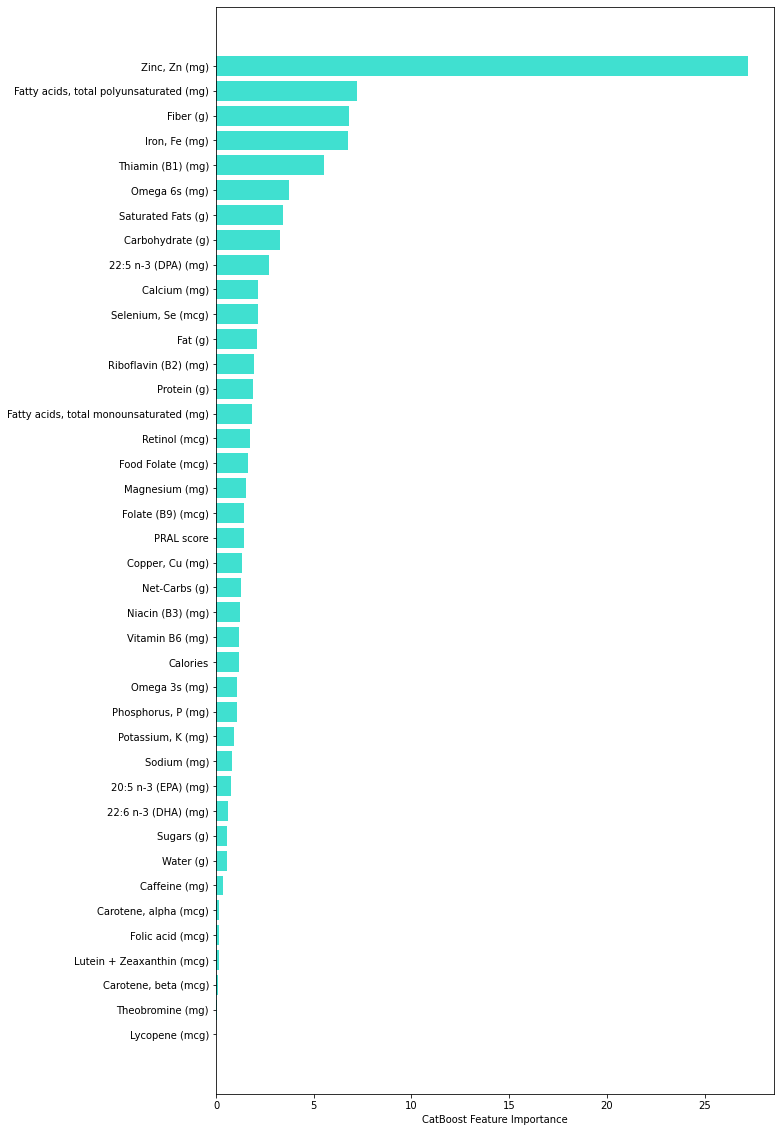

In [39]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.figure(figsize = (10,20))
plt.barh(nutrition_titles[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

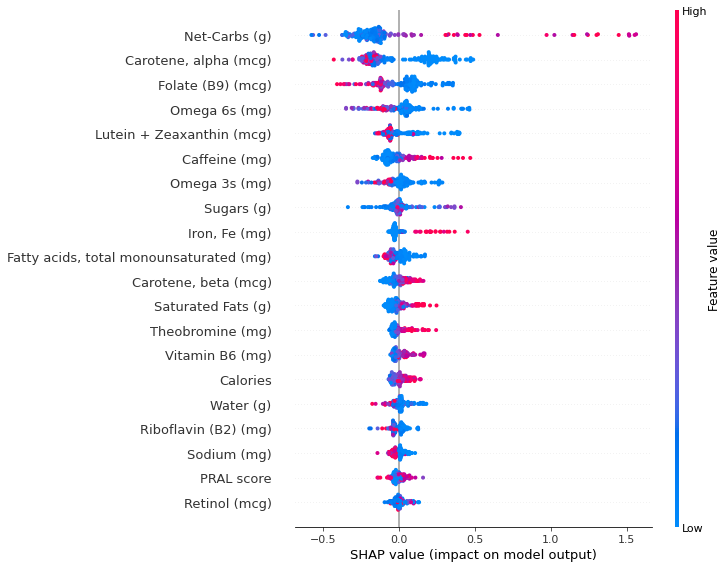

In [38]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names = nutrition_titles[sorted_feature_importance])